# MLP architecture comparison

This notebook discusses predictions made using a selection of different MLP architectures, primarily hidden layer sizes. The minimal model *A* is used, with four input features and one output target.

In general, the model architecture has the following effect on model performance:
- Too few neurons or layers may make the model incapable of discovering nonlinear and/or  deep patterns within the dataset, and thus underfit
- Too many neurons or layers may make the model discover underlying patterns that are complex, but not relevant to the problem, and thus overfit.

Finding the optimal model architecture and model hyperparameters generally requires extensive trial and error, e.g. in the form of a grid search. For this comparison, some hyperparameters known to work well on the relevant datasets are chosen (i.e. the library defaults).

## Step 0: Import modules

In [1]:
# %load mlp_comparison.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Implement required methods

A method is implemented to perform initialization, training and predictions for a model. These are all functions of the high-level API, and thus nothing out of the ordinary. The function is simply implemented for simplification of the following code.

In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
        score=score,
    )

# Dataset D

## Step 2: Define dataset specifics

In [3]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', 'C', '10min')

## Step 3: Initiate and divide data

In [4]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 20PDT001 - Process Pressure Difference
Col. 4 : 50TT001 - Coolant Inlet Temperature
Col. 5 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows



## Step 4: Define models

The same models are used for each dataset, however they have to be redefined because each model is initiated using the dataset current stored in the API state.

In [5]:
mlp_1x_16 = mlApi.MLP('mlp 1x16', layers=[16], dropout=0.3)
mlp_1x_32 = mlApi.MLP('mlp 1x32', layers=[32], dropout=0.3)
mlp_1x_64 = mlApi.MLP('mlp 1x64', layers=[64], dropout=0.3)
mlp_1x_128 = mlApi.MLP('mlp 1x128', layers=[128], dropout=0.3)

mlp_2x_16 = mlApi.MLP('mlp 2x16', layers=[16, 16], dropout=0.3)
mlp_2x_32 = mlApi.MLP('mlp 2x32', layers=[32, 32], dropout=0.3)
mlp_2x_64 = mlApi.MLP('mlp 2x64', layers=[64, 64], dropout=0.3)
mlp_2x_128 = mlApi.MLP('mlp 2x128', layers=[128, 128], dropout=0.3)

linear_cv = mlApi.Linear_Regularized('linear')

ensemble = mlApi.Ensemble('mlp 1x64 + linear', [mlp_1x_64, linear_cv])
ensemble2 = mlApi.Ensemble('mlp 2x64 + linear', [mlp_2x_64, linear_cv])

## Step 5: Make predictions

Predictions are made in bulks in order to enhance plot readability. The following bulks are discussed invidually: 
1. First, the simplest model architectures with fewest neurons per layer
2. Then, the more complex model architectures
3. Finally, the ensemble models

This is performed for each of the three datasets; *D*, *F* and *G*.

### Simplest models

Training model linear
    Trained weights for linear:
[[-0.14632785 -0.9854926   0.04139093 -0.03917241]
 [ 0.00136561  0.99668352  0.00426255 -0.00840648]]
Model mlp 1x16 was loaded from file
Model mlp 1x32 was loaded from file
Model mlp 2x16 was loaded from file
Model mlp 2x32 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 1x16 |  0.052881 |   0.080618  |    0.003523   |  1262  |
| mlp 1x32 |  0.031113 |   0.05013   |    0.002242   |  715   |
| mlp 2x16 |  0.100525 |   0.200729  |    0.018515   |  402   |
| mlp 2x32 |  0.039666 |   0.067652  |    0.002084   |  1000  |
+----------+-----------+-------------+---------------+--------+


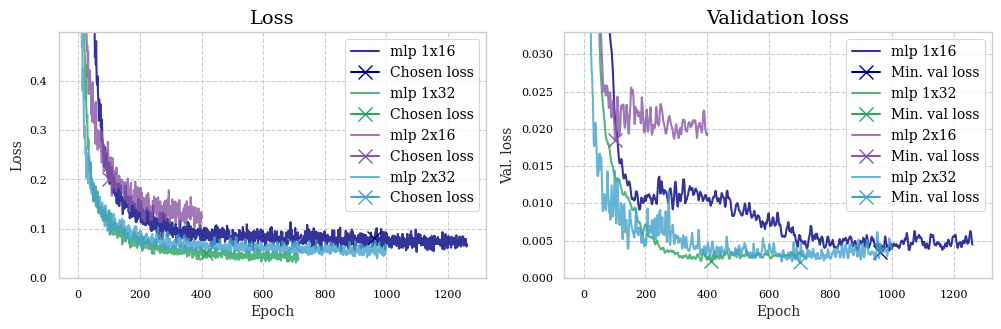

Model prediction scores
+----------+-------------+------------+
|  Model   | Train score | Test score |
+----------+-------------+------------+
|  linear  |    0.9938   |   0.934    |
| mlp 1x16 |    0.9936   |   0.8794   |
| mlp 1x32 |    0.996    |   0.7815   |
| mlp 2x16 |    0.9629   |   0.8488   |
| mlp 2x32 |    0.9815   |   0.8092   |
+----------+-------------+------------+


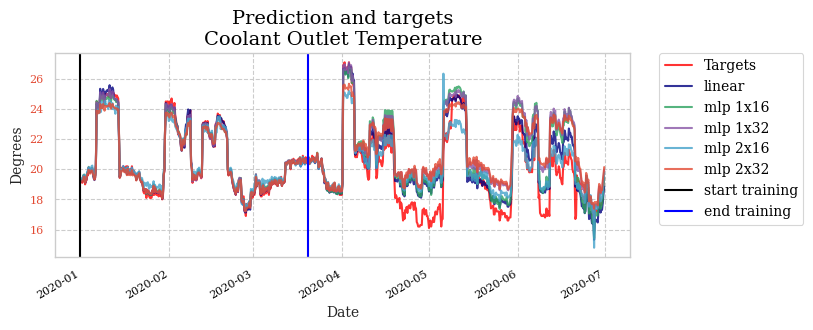

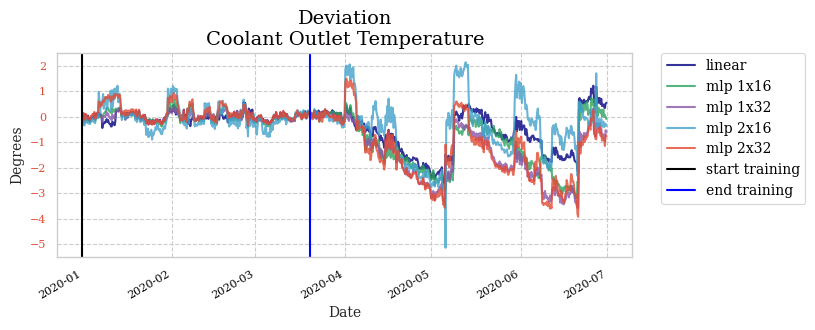

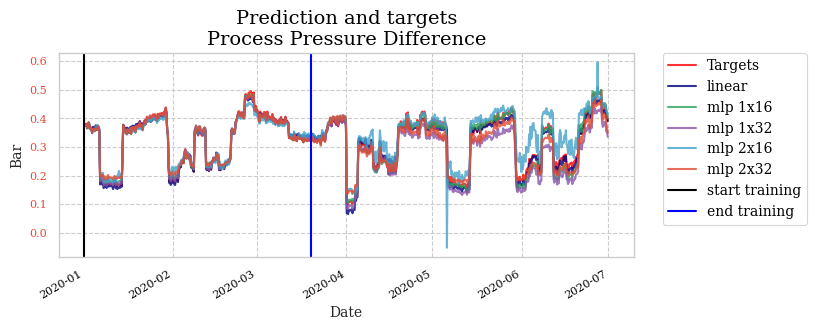

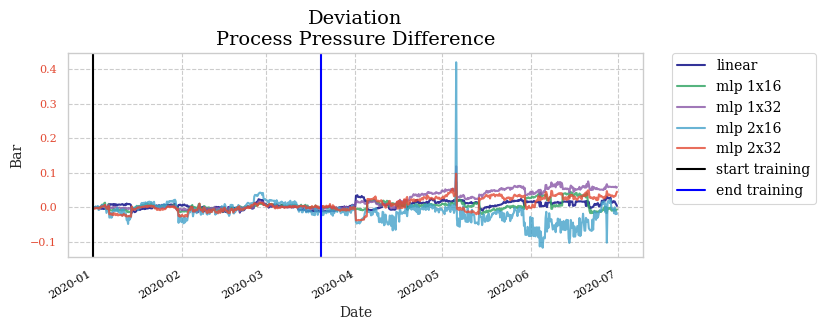

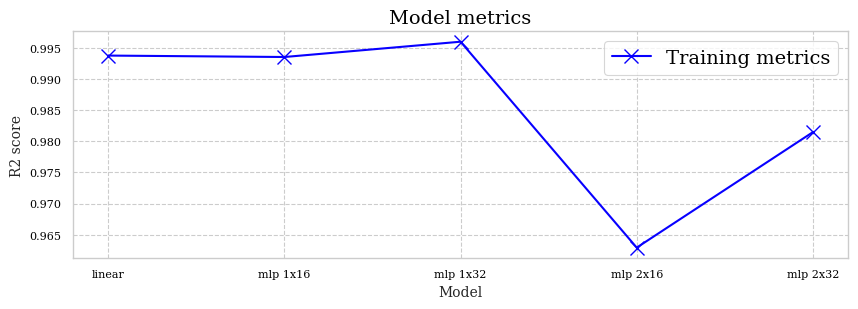

In [6]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_2x_16,
    mlp_2x_32,
]

initTrainPredict(modelList)

### More complex models

Training model linear
    Trained weights for linear:
[[-0.14632785 -0.9854926   0.04139093 -0.03917241]
 [ 0.00136561  0.99668352  0.00426255 -0.00840648]]
Model mlp 1x64 was loaded from file
Model mlp 1x128 was loaded from file
Model mlp 2x64 was loaded from file
Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 1x64 |  0.015481 |   0.019988  |    0.001507   |  645   |
| mlp 1x128 |  0.008416 |   0.014273  |    0.001417   |  737   |
|  mlp 2x64 |  0.024071 |   0.047466  |    0.002315   |  502   |
| mlp 2x128 |  0.014415 |   0.02731   |    0.002115   |  502   |
+-----------+-----------+-------------+---------------+--------+


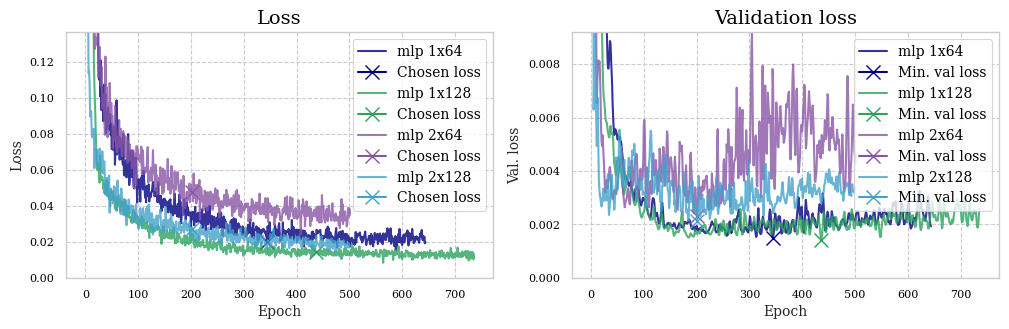

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.9938   |   0.934    |
|  mlp 1x64 |    0.9982   |   0.8436   |
| mlp 1x128 |    0.9983   |   0.916    |
|  mlp 2x64 |    0.9946   |   0.8589   |
| mlp 2x128 |    0.9974   |   0.8877   |
+-----------+-------------+------------+


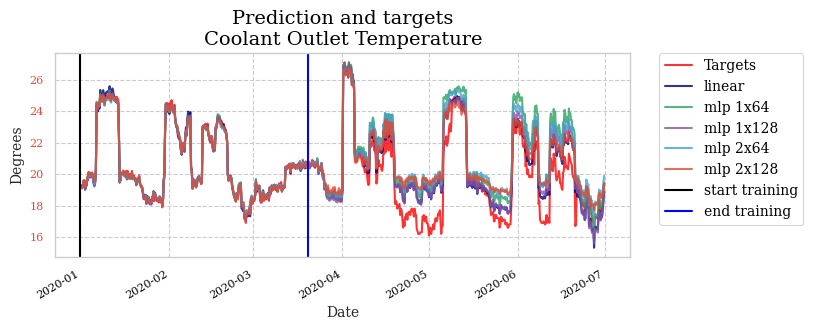

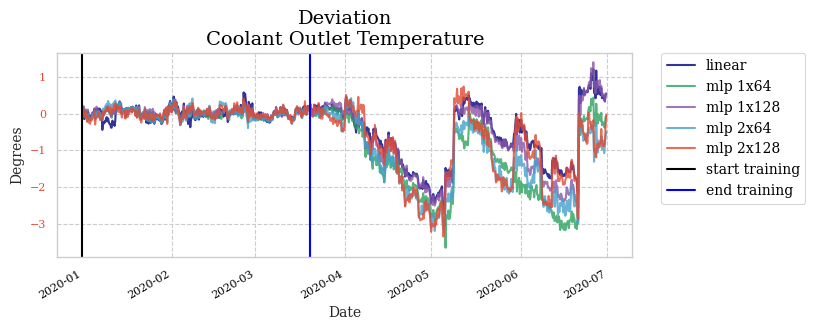

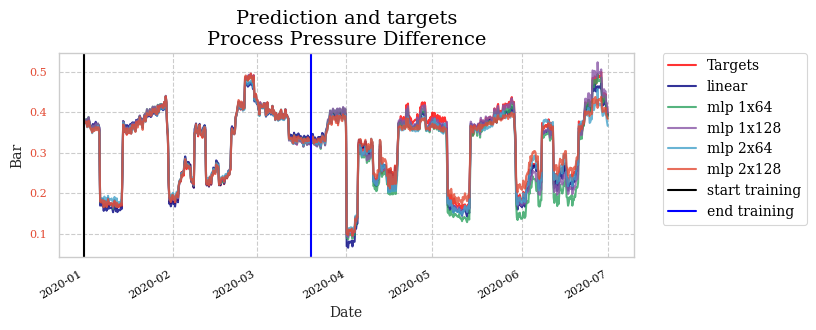

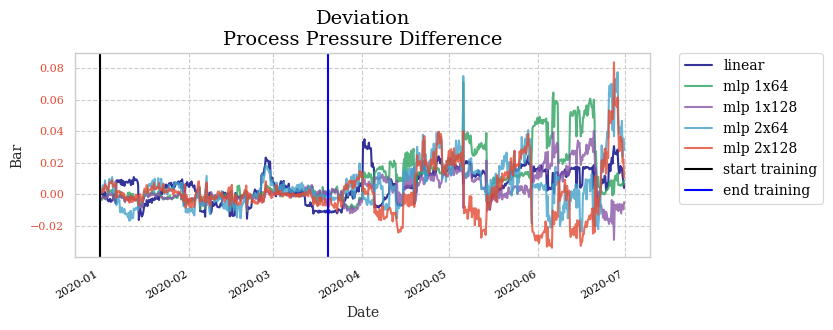

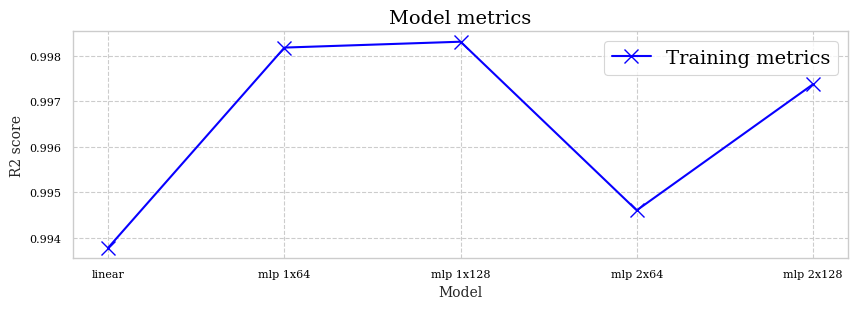

In [7]:
modelList = [
    linear_cv,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_64,
    mlp_2x_128,
]

initTrainPredict(modelList)

### Ensemble models

Training model linear
    Trained weights for linear:
[[-0.14632785 -0.9854926   0.04139093 -0.03917241]
 [ 0.00136561  0.99668352  0.00426255 -0.00840648]]
Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
    Trained weights for linear:
[[-0.14632785 -0.9854926   0.04139093 -0.03917241]
 [ 0.00136561  0.99668352  0.00426255 -0.00840648]]
    Trained weights for Linear model of ensemble:
[[ 0.99751453  0.07819214  0.0704511  -0.00830968]
 [ 0.11459332  0.94121569 -0.07984378  0.09311694]]
Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
    Trained weights for linear:
[[-0.14632785 -0.9854926   0.04139093 -0.03917241]
 [ 0.00136561  0.99668352  0.00426255 -0.00840648]]
    Trained weights for Linear model of ensemble:
[[ 0.79850842  0.10825829  0.32213408  0.01480472]
 [ 0.36678286  1.06489405 -0.2267403   0.07339098]]
+-----------------------------+-----------+-------------+----------

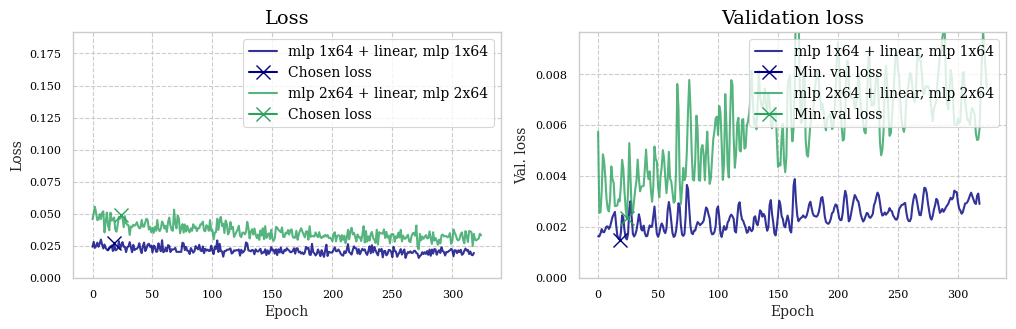

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|       linear      |    0.9938   |   0.934    |
| mlp 1x64 + linear |    0.9986   |   0.8617   |
| mlp 2x64 + linear |    0.9976   |   0.8909   |
+-------------------+-------------+------------+


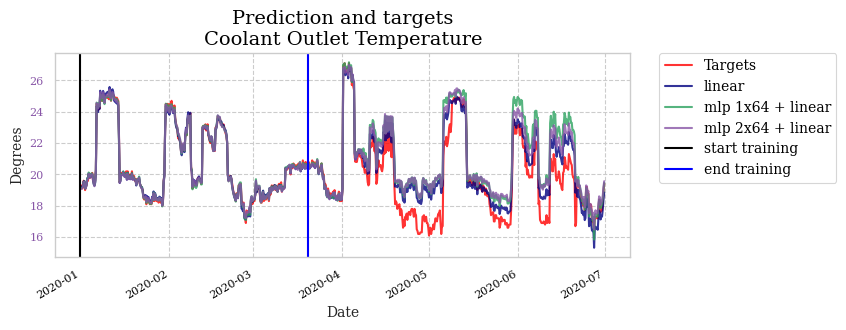

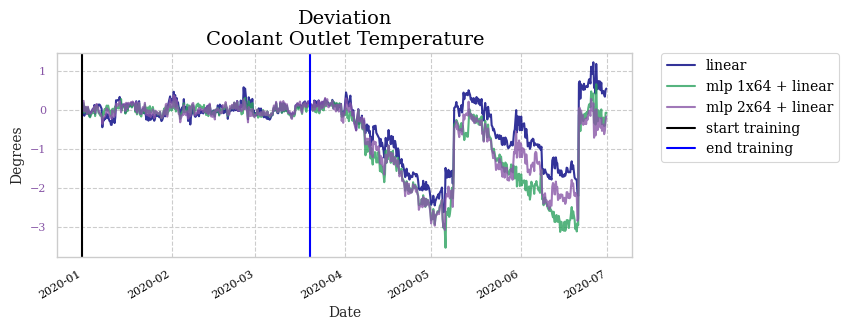

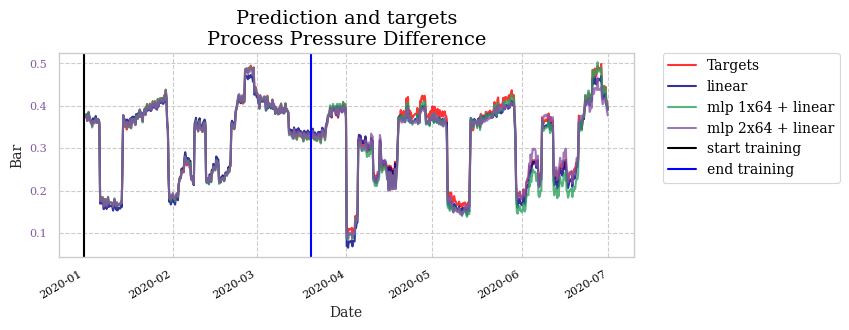

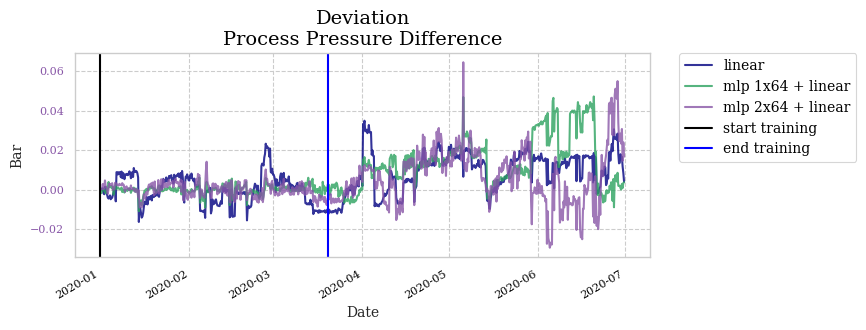

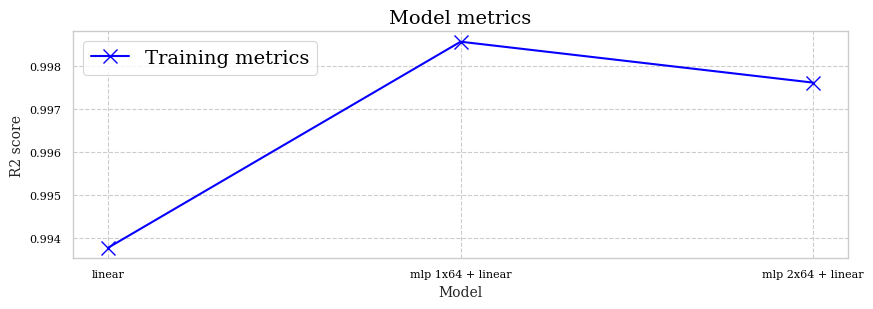

In [8]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
]

initTrainPredict(modelList)

# Discussion, Dataset D

First, notice that both the simplest and most complex MLP models have certain problems preciting the linear increase in fouling. There are significants jump in deviation for the Coolant Outlet Temperature e.g. around 2020-06. The same can however be said for the linear model. The different architectures reset to slightly different values following the reset of fouling, e.g. *mlp 1x64* and *mlp 2x64* not quite reaching zero on the first reset while *mlp 1x128* and the linear model exceed zero towards the end of the dataset, non of which are wanted qualities. Note that the MLP models in general reach a larger minimum dveiation value than the linear model. In general, the models' ability to predict the linear increase in fouling are good, but it is unclear which model provides the most accurate result.

Deviation between measured and predicted Process Pressure Difference varies drastically for each model. There is no clear pattern in the dP increase. The large differences in model prediction may suggest these models are not capable of learning a suitable function for the Pressure Difference, or that the deviation value is so small it can be considered noise.

In [9]:
mlApi.reset()

# Dataset F

In [10]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('F', 'A', '30min')

In [11]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [12]:
mlp_1x_16 = mlApi.MLP('mlp 1x16', layers=[16], dropout=0.3)
mlp_1x_32 = mlApi.MLP('mlp 1x32', layers=[32], dropout=0.3)
mlp_1x_64 = mlApi.MLP('mlp 1x64', layers=[64], dropout=0.3)
mlp_1x_128 = mlApi.MLP('mlp 1x128', layers=[128], dropout=0.3)

mlp_2x_16 = mlApi.MLP('mlp 2x16', layers=[16, 16], dropout=0.3)
mlp_2x_32 = mlApi.MLP('mlp 2x32', layers=[32, 32], dropout=0.3)
mlp_2x_64 = mlApi.MLP('mlp 2x64', layers=[64, 64], dropout=0.3)
mlp_2x_128 = mlApi.MLP('mlp 2x128', layers=[128, 128], dropout=0.3)

linear_cv = mlApi.Linear_Regularized('linear')

ensemble = mlApi.Ensemble('mlp 1x64 + linear', [mlp_1x_64, linear_cv])
ensemble2 = mlApi.Ensemble('mlp 2x64 + linear', [mlp_2x_64, linear_cv])

### Simplest models

Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model mlp 1x16 was loaded from file
Model mlp 1x32 was loaded from file
Model mlp 1x64 was loaded from file
Model mlp 1x128 was loaded from file
Model mlp 2x16 was loaded from file
Model mlp 2x32 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 1x16 |  0.548237 |   0.56606   |    0.588178   |  596   |
|  mlp 1x32 |  0.520374 |   0.535288  |    0.491035   |  748   |
|  mlp 1x64 |  0.471904 |   0.481929  |    0.313419   |  746   |
| mlp 1x128 |  0.44912  |   0.466447  |     0.3303    |  463   |
|  mlp 2x16 |  0.492351 |   1.179906  |    0.316125   |  301   |
|  mlp 2x32 |  0.419407 |   0.443034  |    0.399561   |  438   |
+-----------+-----------+-------------+---------------+--------+


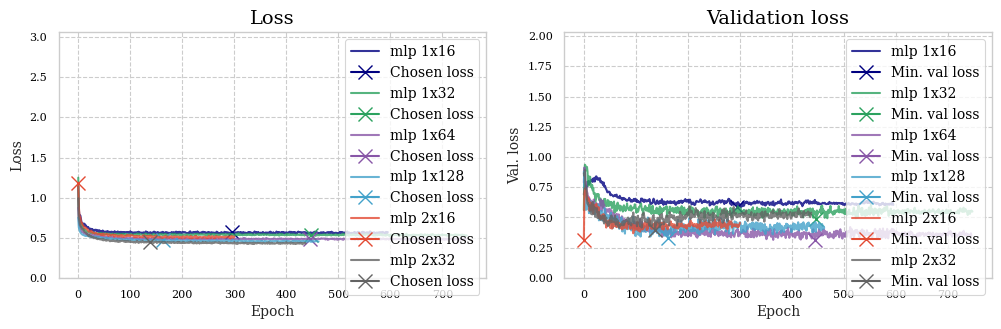

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.3234   |   0.0673   |
|  mlp 1x16 |    0.4749   |  -3.6415   |
|  mlp 1x32 |    0.5101   |  -2.8978   |
|  mlp 1x64 |    0.5808   |  -0.1636   |
| mlp 1x128 |    0.5855   |  -0.3868   |
|  mlp 2x16 |    0.2185   |   0.2169   |
|  mlp 2x32 |    0.5983   |   0.3682   |
+-----------+-------------+------------+


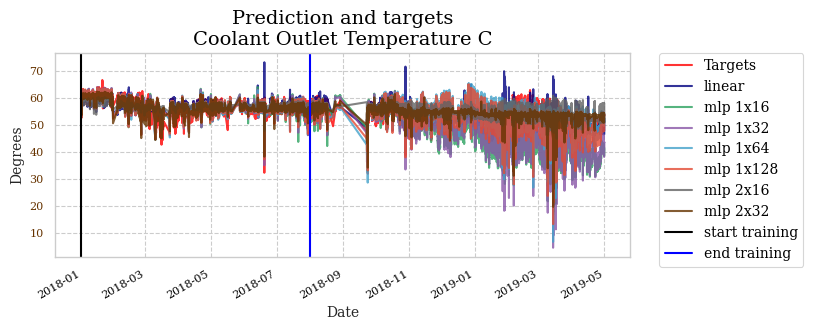

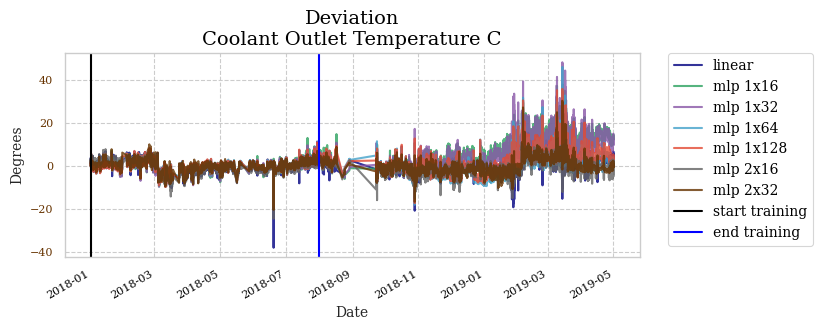

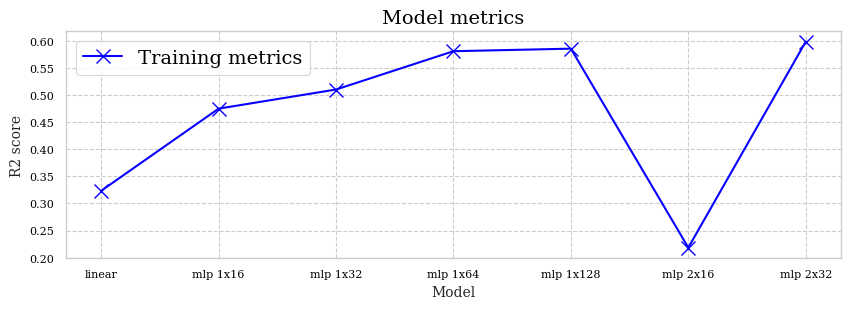

In [13]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_16,
    mlp_2x_32,
]

initTrainPredict(modelList)

### More complex models

Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model mlp 2x64 was loaded from file
Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 2x64 |  0.371677 |   0.404053  |    0.394827   |  493   |
| mlp 2x128 |   0.3174  |   0.351457  |    0.355503   |  603   |
+-----------+-----------+-------------+---------------+--------+


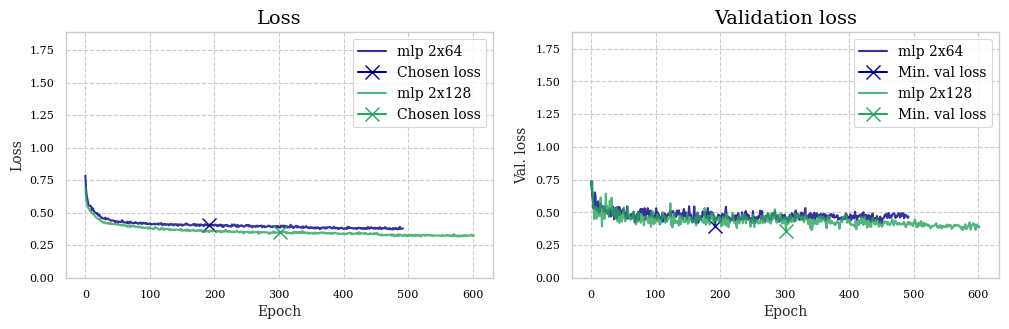

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.3234   |   0.0673   |
|  mlp 2x64 |    0.624    |   0.3516   |
| mlp 2x128 |    0.6695   |   0.4012   |
+-----------+-------------+------------+


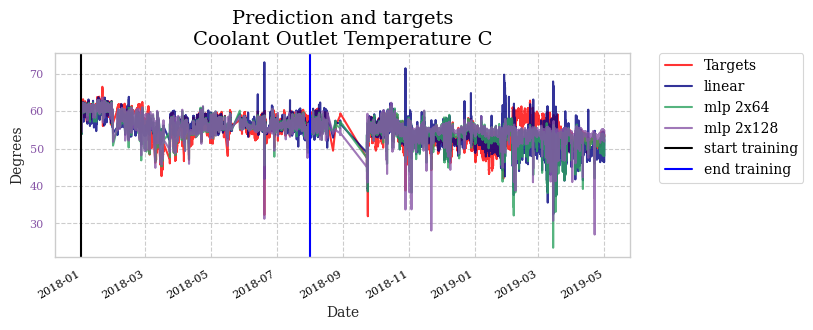

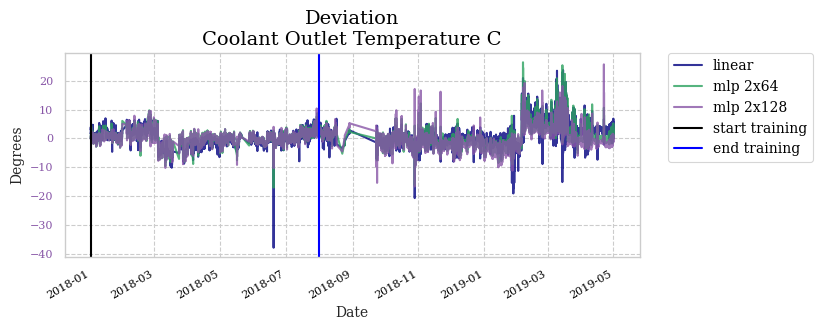

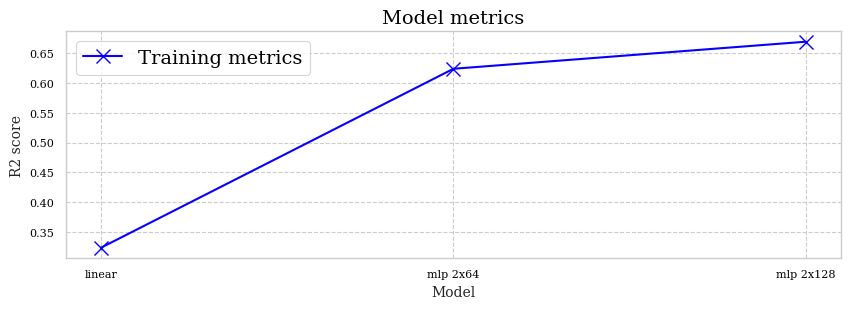

In [14]:
modelList = [
    linear_cv,
    mlp_2x_64,
    mlp_2x_128,
]

initTrainPredict(modelList)

### Ensemble models

Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[ 0.84822877 -0.10133433]]
Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
    Trained weights for Linear model of ensemble:
[[ 0.8382565  -0.05566557]]
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| mlp 1x64 + linear, mlp 1x64 |  0.470511 |   0.480822  |    0.289332   |  328   |
| mlp 2x64 + linear, mlp 2x64 |  0.369

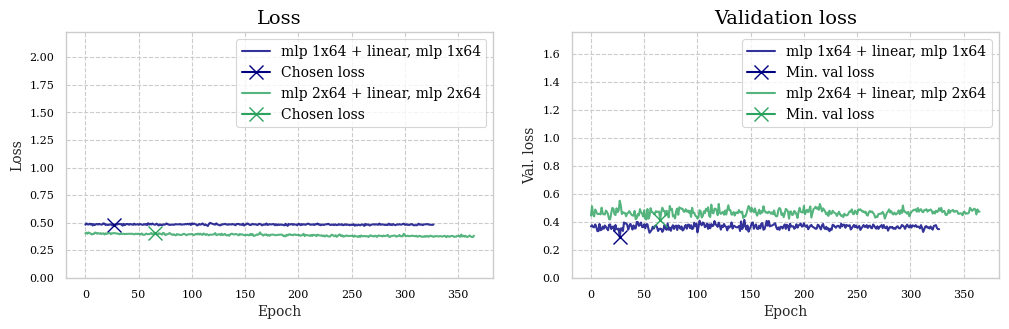

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|       linear      |    0.3234   |   0.0673   |
| mlp 1x64 + linear |    0.594    |  -0.4079   |
| mlp 2x64 + linear |    0.6363   |   0.3149   |
+-------------------+-------------+------------+


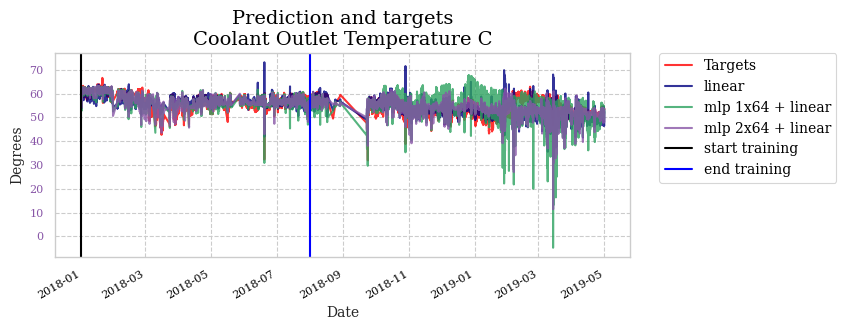

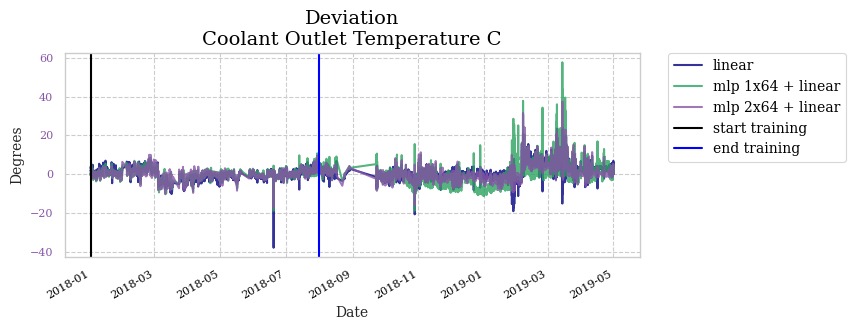

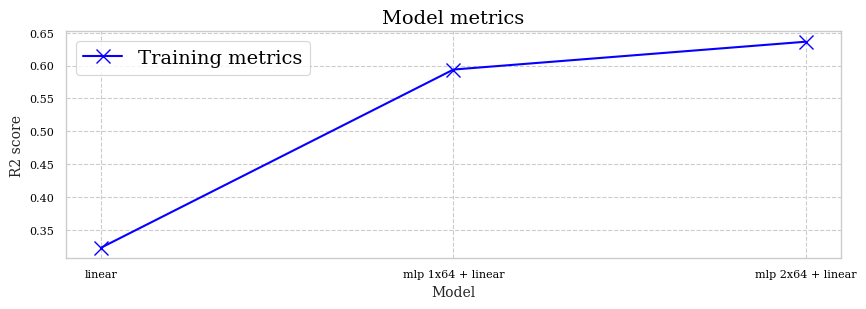

In [15]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
]

initTrainPredict(modelList)

# Discussion, Dataset F

Notice that some of the simple models have not converged, while others vary drastically in prediction following the heat exchanger maintenance around 2019-02. The complex models provide more stable predictions and appear more suitable at estimating the heat exchanger performance. Deviation between measured and predicted Coolant Outlet Temperature slowly increases up until maintenance, after which it resets to slightly above zero and once more gradually increases. Some more unstable predictions can be seen around 2019-03, for which it was explained in previous notebooks that certain dataset features experience more drastic variations as well. Combining the complex MLP models with linear models as an ensemble does not appear to give significant increases in model accuracy.

In [16]:
mlApi.reset()

# Dataset G

In [17]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'C', '10min')

In [18]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 13885 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows



In [19]:
mlp_1x_16 = mlApi.MLP('mlp 1x16', layers=[16], dropout=0.3)
mlp_1x_32 = mlApi.MLP('mlp 1x32', layers=[32], dropout=0.3)
mlp_1x_64 = mlApi.MLP('mlp 1x64', layers=[64], dropout=0.3)
mlp_1x_128 = mlApi.MLP('mlp 1x128', layers=[128], dropout=0.3)

mlp_2x_16 = mlApi.MLP('mlp 2x16', layers=[16, 16], dropout=0.3)
mlp_2x_32 = mlApi.MLP('mlp 2x32', layers=[32, 32], dropout=0.3)
mlp_2x_64 = mlApi.MLP('mlp 2x64', layers=[64, 64], dropout=0.3)
mlp_2x_128 = mlApi.MLP('mlp 2x128', layers=[128, 128], dropout=0.3)

linear_cv = mlApi.Linear_Regularized('linear')

ensemble = mlApi.Ensemble('mlp 1x64 + linear', [mlp_1x_64, linear_cv])
ensemble2 = mlApi.Ensemble('mlp 2x64 + linear', [mlp_2x_64, linear_cv])

### Simplest models

Training model linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model mlp 1x16 was loaded from file
Model mlp 1x32 was loaded from file
Model mlp 1x64 was loaded from file
Model mlp 1x128 was loaded from file
Model mlp 2x16 was loaded from file
Model mlp 2x32 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 1x16 |  0.454164 |   0.55639   |    1.72566    |  304   |
|  mlp 1x32 |  0.407057 |   0.574997  |    1.375173   |  302   |
|  mlp 1x64 |  0.370477 |   0.403066  |    1.952459   |  307   |
| mlp 1x128 |  0.345481 |   0.55849   |    1.696943   |  301   |
|  mlp 2x16 |  0.455086 |   0.996223  |    1.054864   |  301   |
|  mlp 2x32 |  0.363819 |   0.721563  |    1.480559   |  301   |
+-----------+-----------+-------------+--

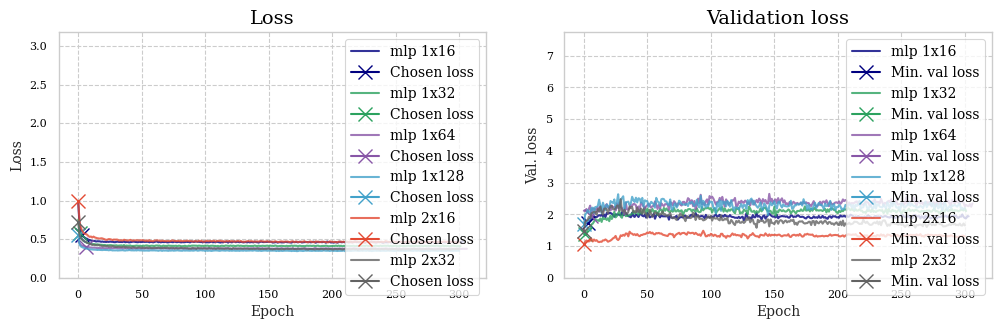

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.4405   |  -0.9779   |
|  mlp 1x16 |    0.2882   |  -1.0368   |
|  mlp 1x32 |    0.3581   |  -0.8241   |
|  mlp 1x64 |    0.322    |  -1.3888   |
| mlp 1x128 |    0.3293   |  -0.8968   |
|  mlp 2x16 |    0.2674   |  -0.4255   |
|  mlp 2x32 |    0.342    |  -0.8077   |
+-----------+-------------+------------+


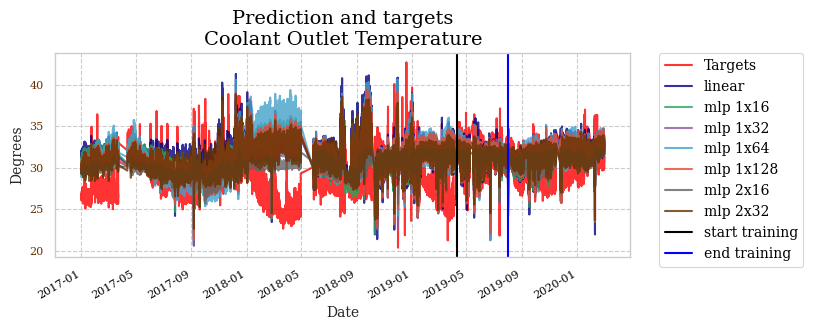

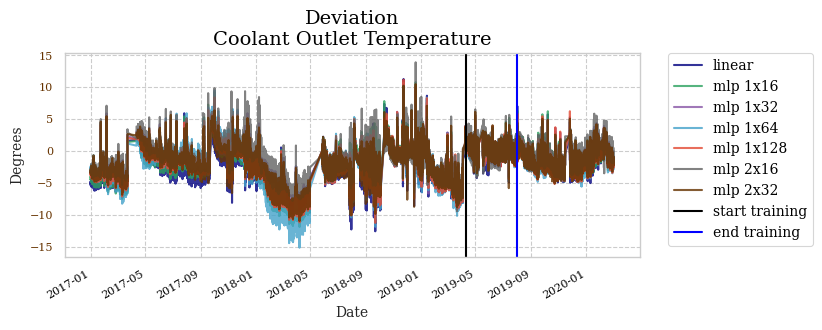

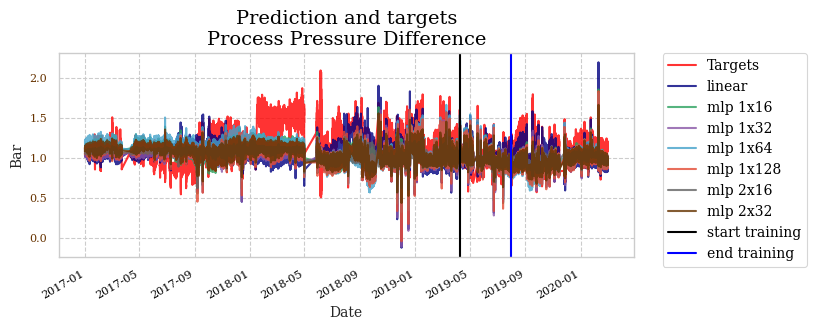

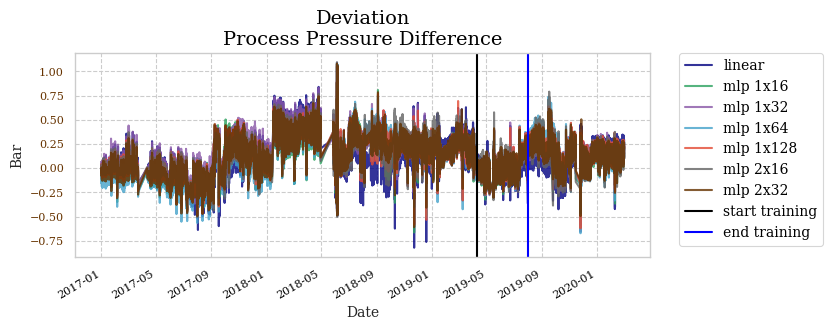

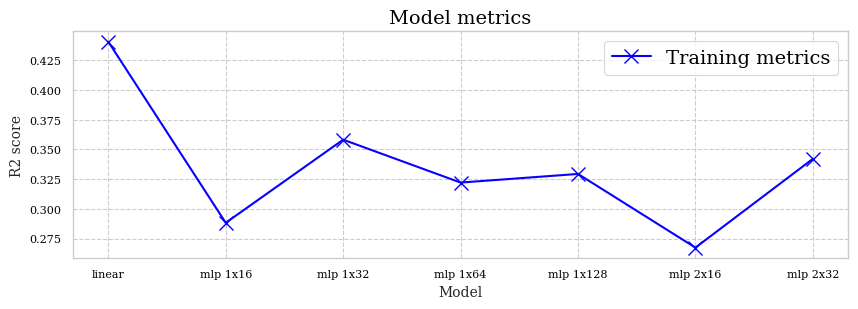

In [20]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_16,
    mlp_2x_32,
]

initTrainPredict(modelList)

### More complex models

Training model linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model mlp 2x64 was loaded from file
Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
|  mlp 2x64 |  0.297285 |   0.333126  |    1.422824   |  375   |
| mlp 2x128 |  0.250416 |   0.278693  |    1.508482   |  382   |
+-----------+-----------+-------------+---------------+--------+


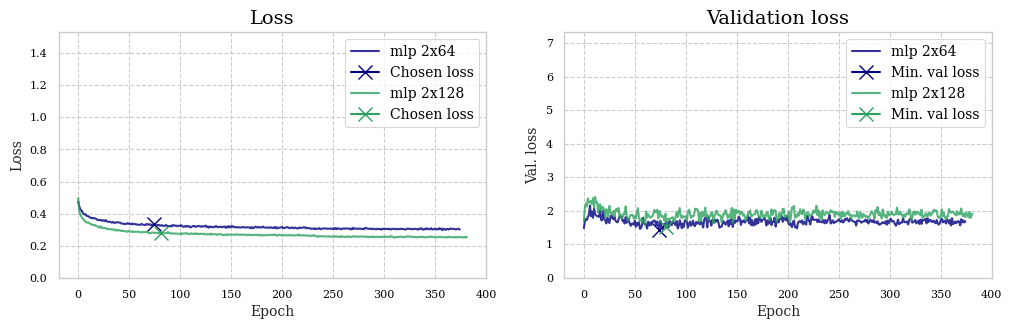

Model prediction scores
+-----------+-------------+------------+
|   Model   | Train score | Test score |
+-----------+-------------+------------+
|   linear  |    0.4405   |  -0.9779   |
|  mlp 2x64 |    0.4927   |  -1.2156   |
| mlp 2x128 |    0.5057   |  -1.4263   |
+-----------+-------------+------------+


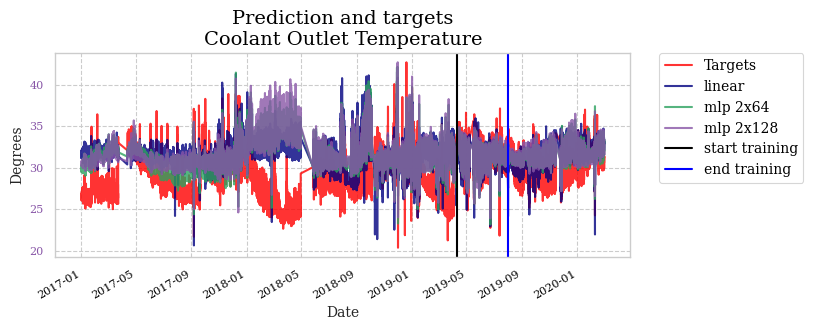

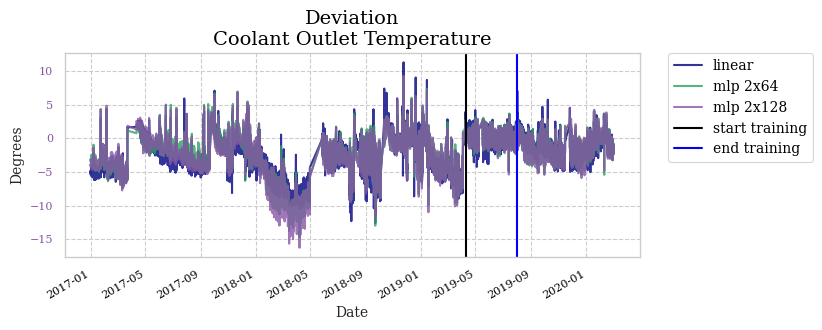

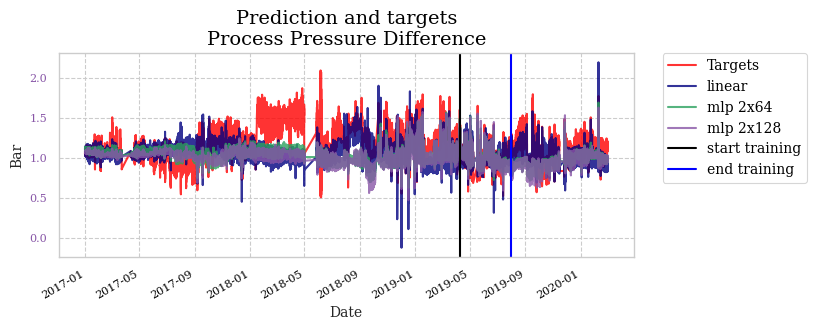

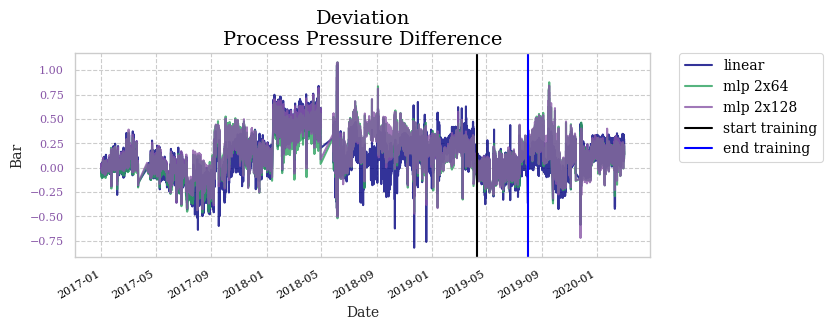

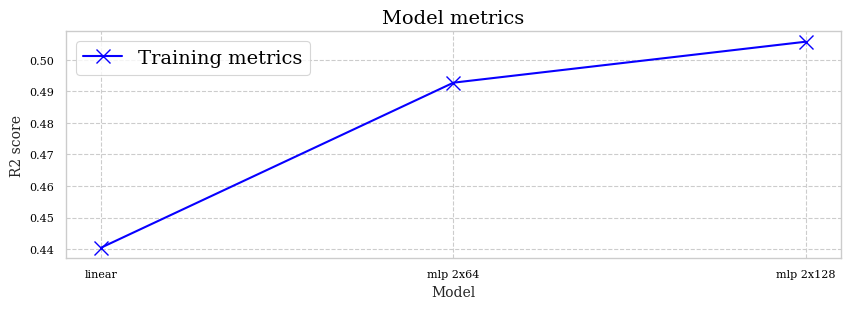

In [21]:
modelList = [
    linear_cv,
    mlp_2x_64,
    mlp_2x_128,
]

initTrainPredict(modelList)

### Ensemble models

Training model linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.82814258  0.01791639 -0.05721699 -0.00653114]
 [ 0.0076107   0.05795189 -0.02256852  0.62712255]]
Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.85820496  0.01653813 -0.01145752  0.02030923]
 [-0.00973256  0.27801347 -0.05630392  0.43574462]]
+-----------------------------+-----------+-------------+----------

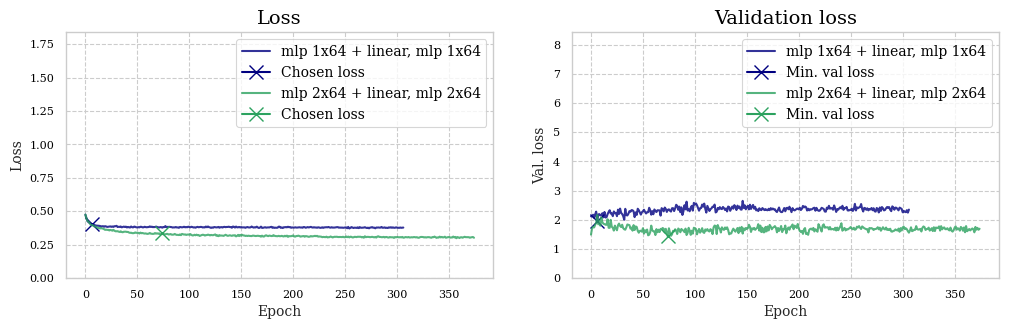

Model prediction scores
+-------------------+-------------+------------+
|       Model       | Train score | Test score |
+-------------------+-------------+------------+
|       linear      |    0.4405   |  -0.9779   |
| mlp 1x64 + linear |    0.5324   |  -1.4013   |
| mlp 2x64 + linear |    0.5934   |  -1.2004   |
+-------------------+-------------+------------+


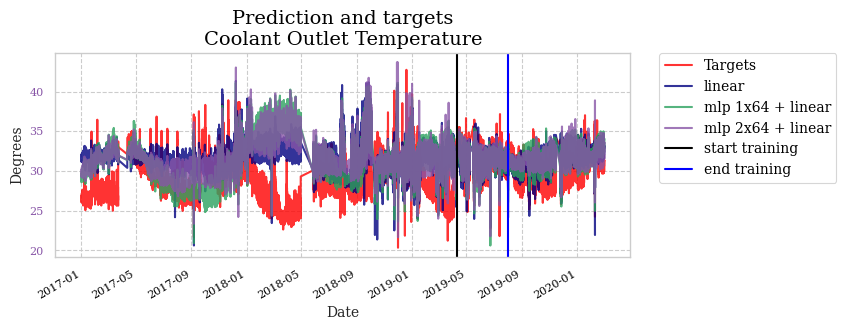

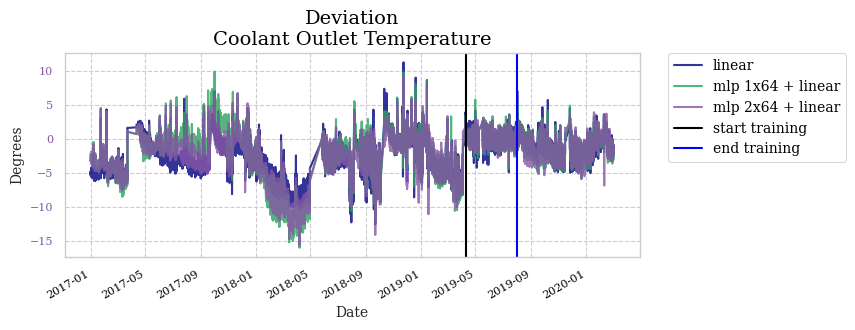

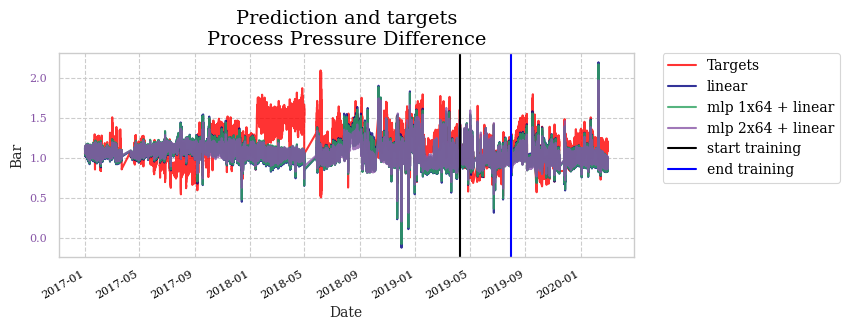

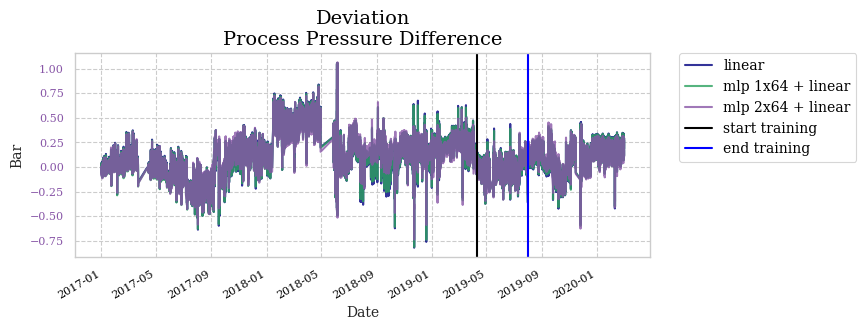

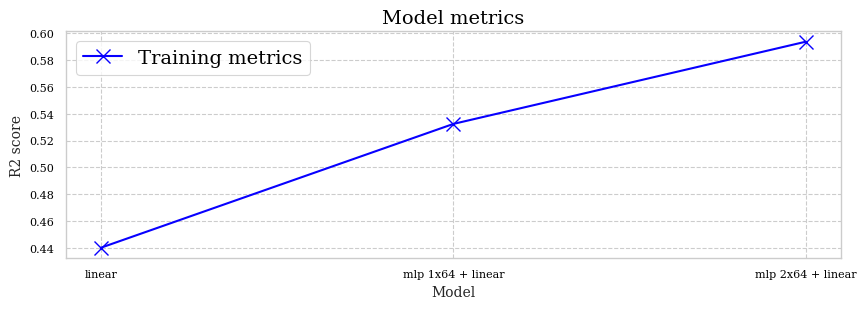

In [22]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
]

initTrainPredict(modelList)

# DIscussions, Dataset G

As was noted previous in the notebook regarding *features_comparison*, the MLP models tend not to converge for dataset G. Especially the simple models have no converged in a satisfying manner. Only *mlp 1x64* and *mlp 2x64* manage to outscore the linear model with regards to R2-score. Even the MLP models that have converged have only a slightly lower validation loss than during the initial iteratons.

# Additional plots

Training model linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]


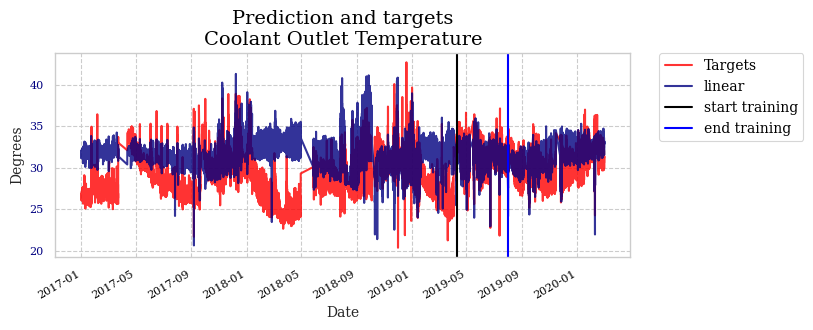

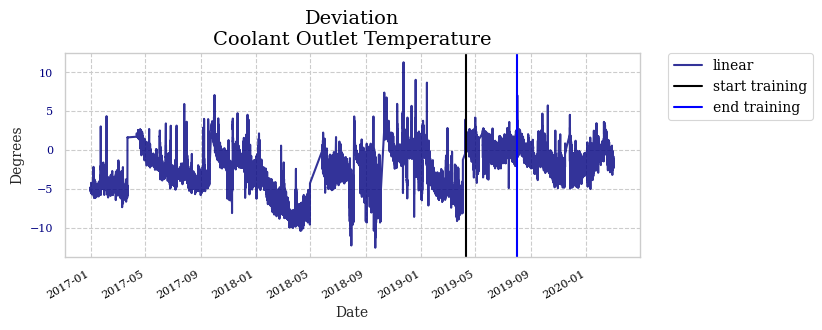

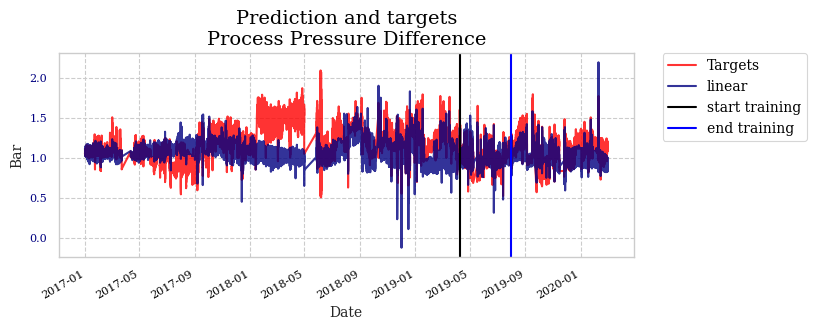

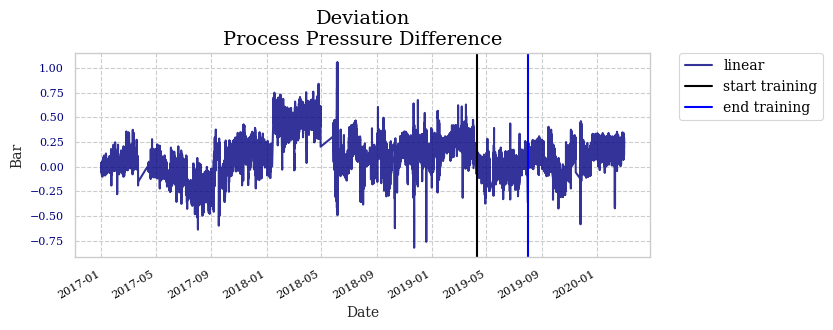

Model mlp 1x16 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 1x16 |  0.454164 |   0.55639   |    1.72566    |  304   |
+----------+-----------+-------------+---------------+--------+


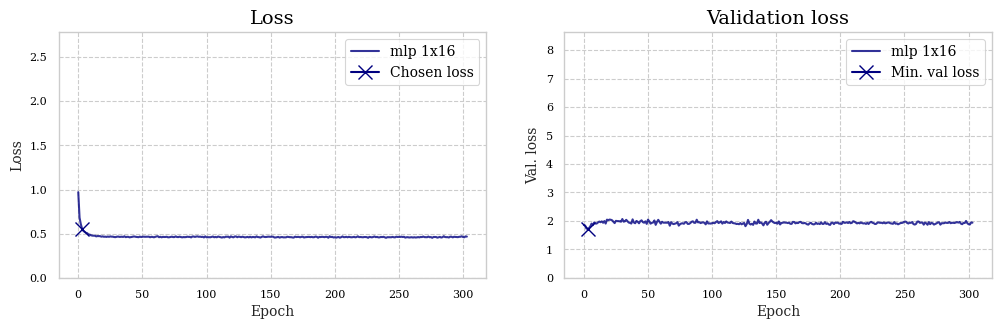

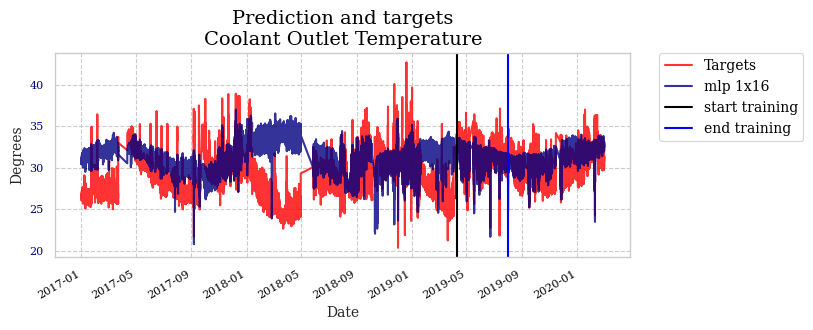

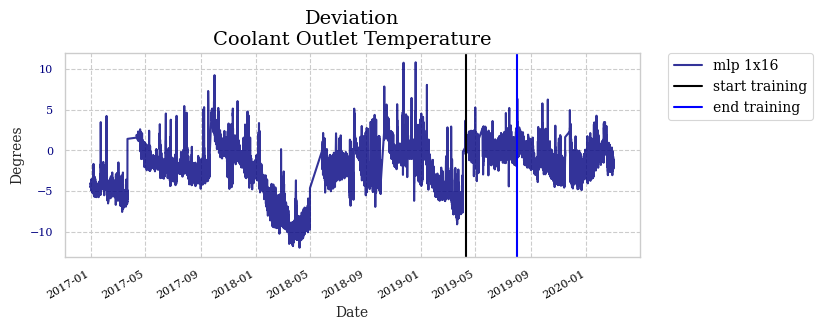

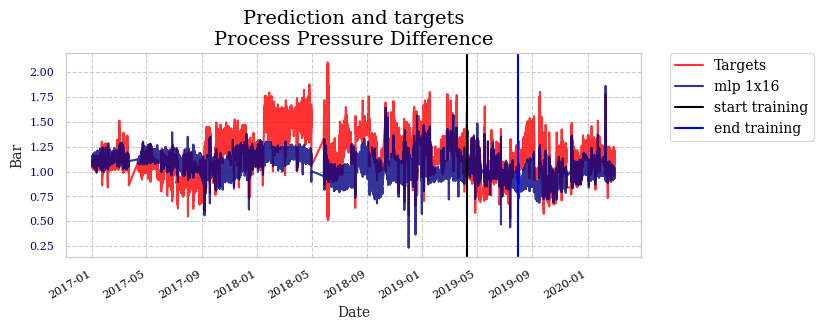

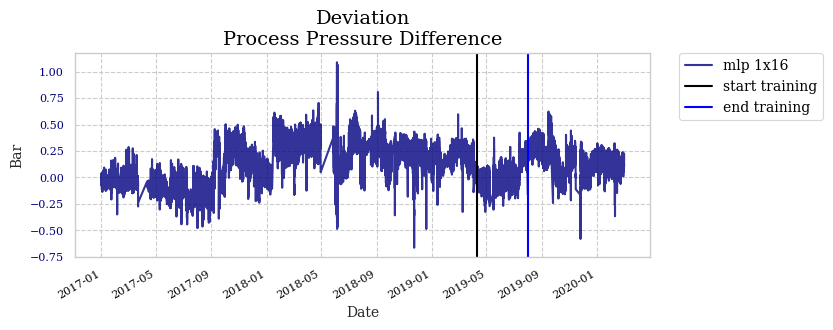

Model mlp 1x32 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 1x32 |  0.407057 |   0.574997  |    1.375173   |  302   |
+----------+-----------+-------------+---------------+--------+


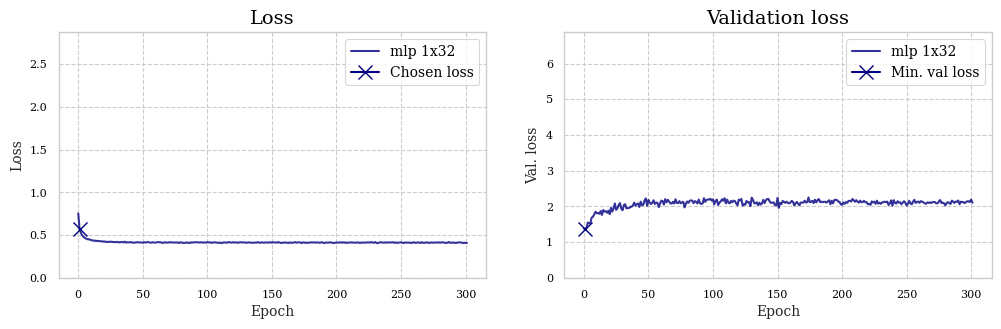

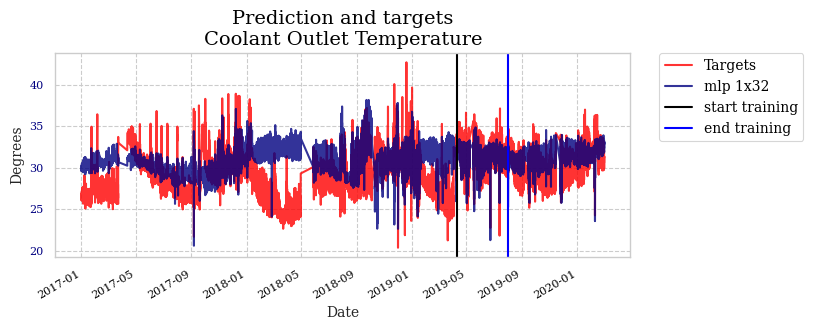

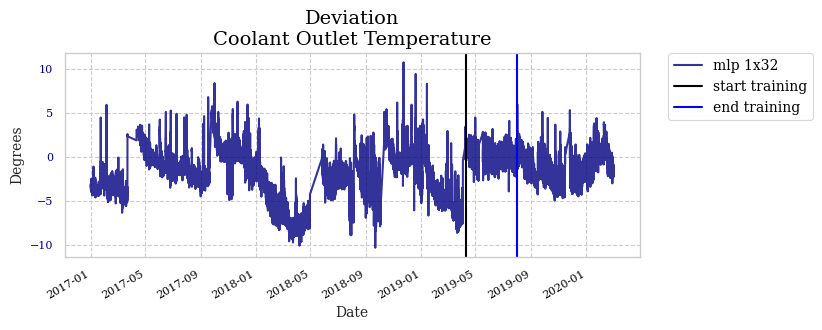

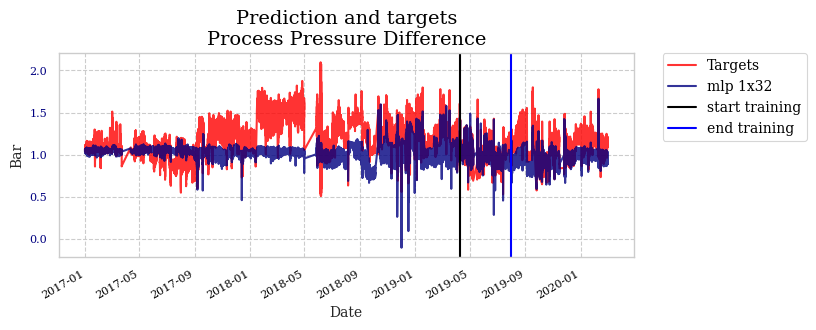

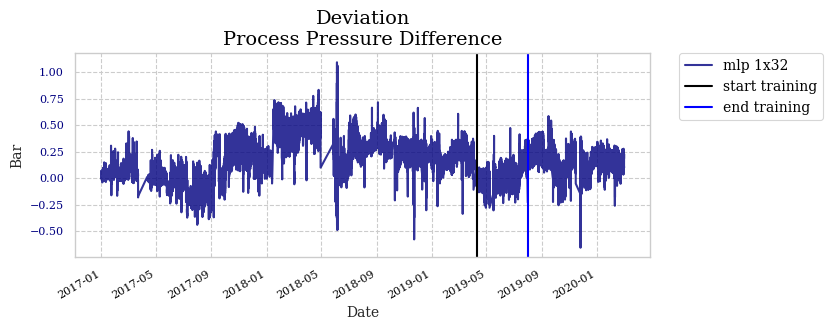

Model mlp 1x64 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 1x64 |  0.370477 |   0.403066  |    1.952459   |  307   |
+----------+-----------+-------------+---------------+--------+


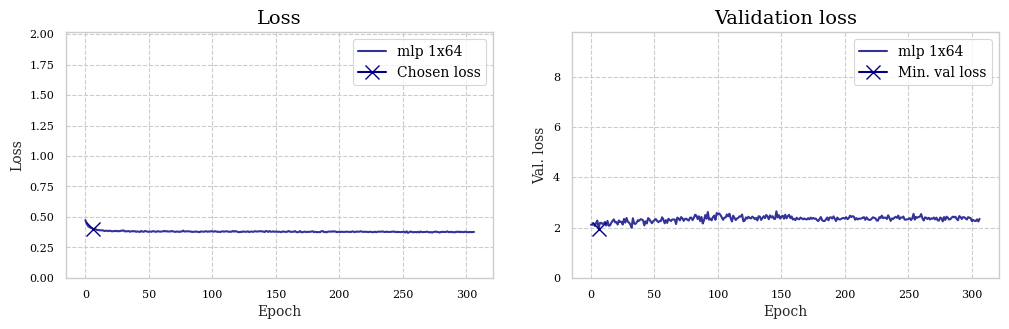

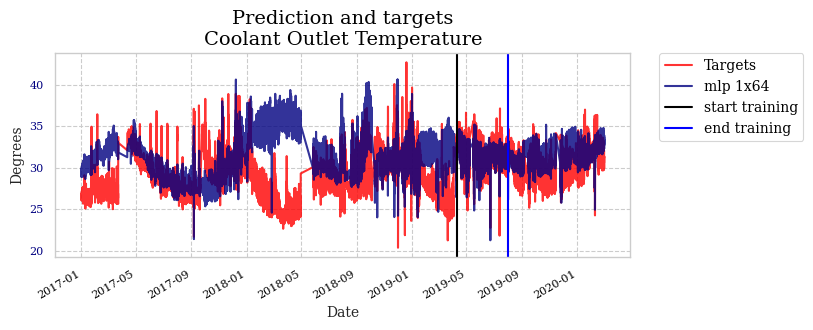

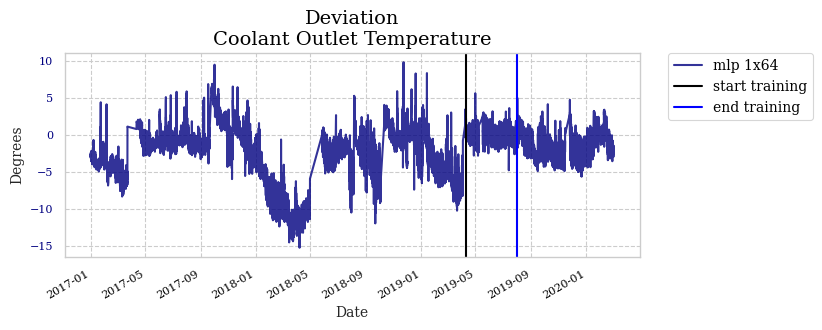

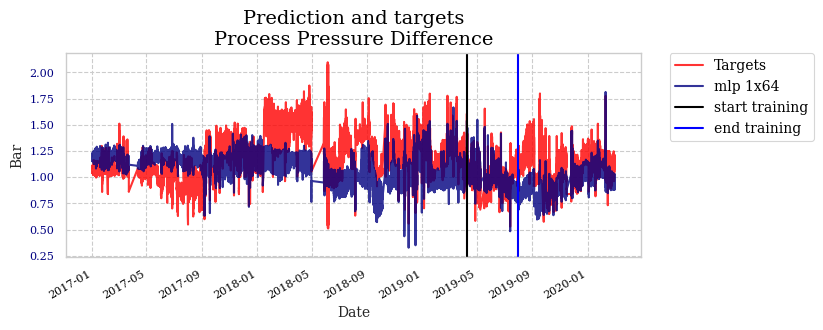

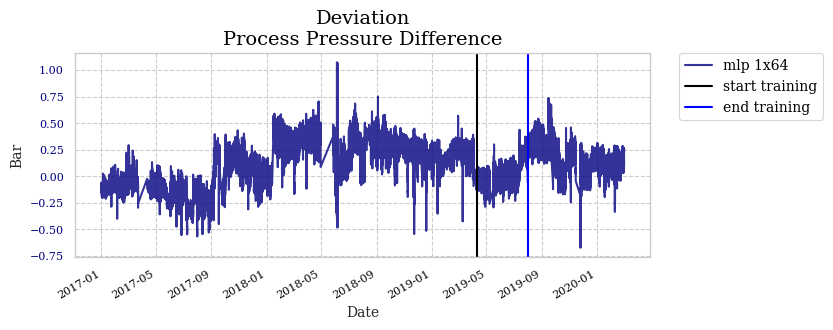

Model mlp 1x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
| mlp 1x128 |  0.345481 |   0.55849   |    1.696943   |  301   |
+-----------+-----------+-------------+---------------+--------+


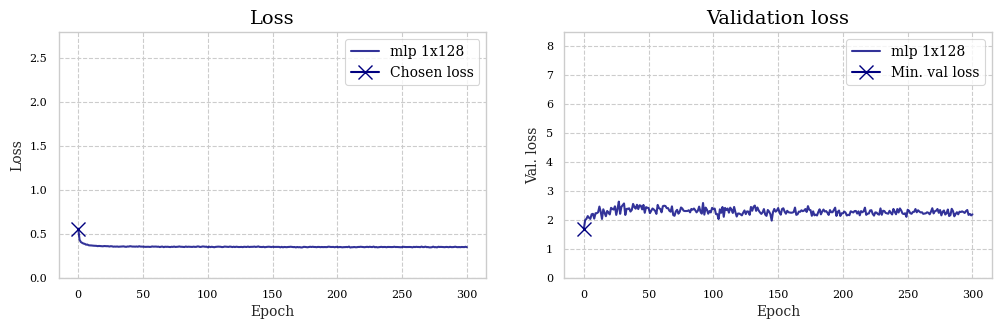

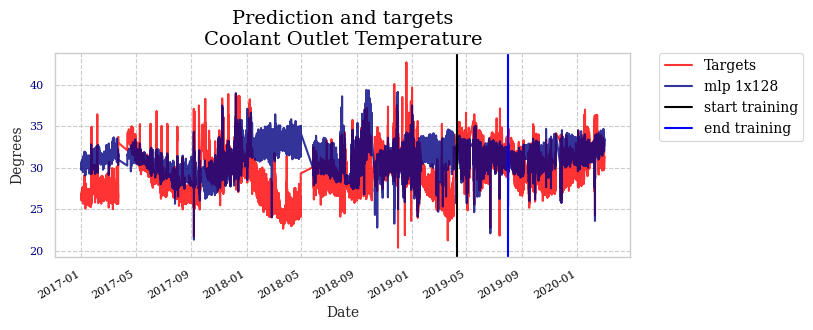

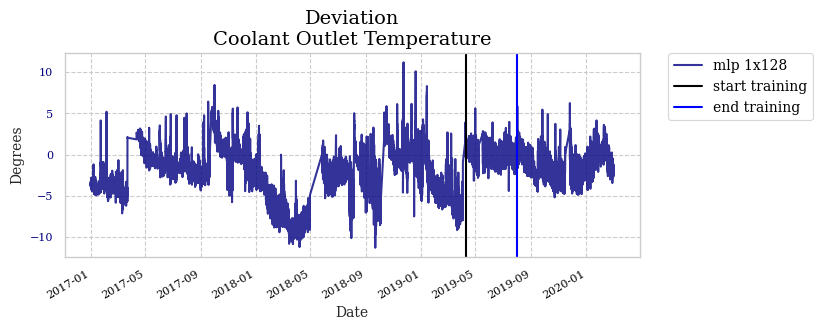

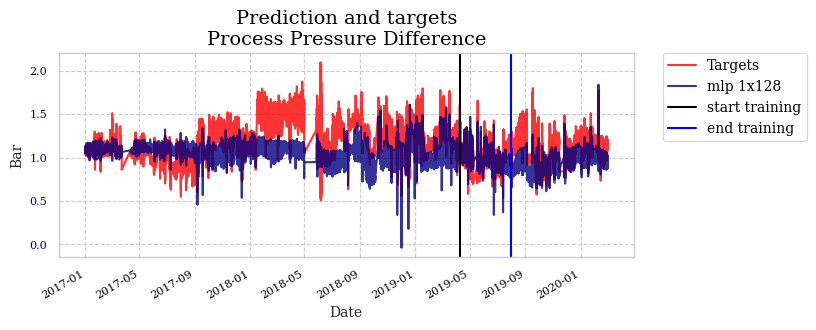

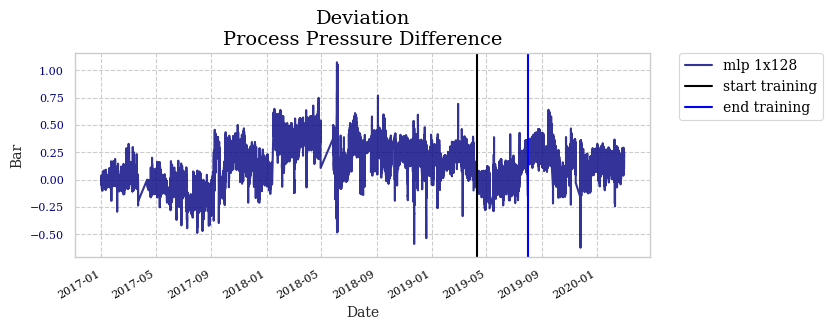

Model mlp 2x16 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 2x16 |  0.455086 |   0.996223  |    1.054864   |  301   |
+----------+-----------+-------------+---------------+--------+


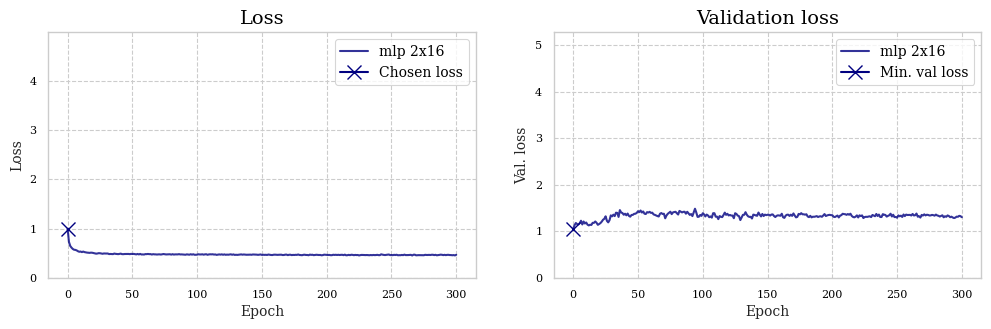

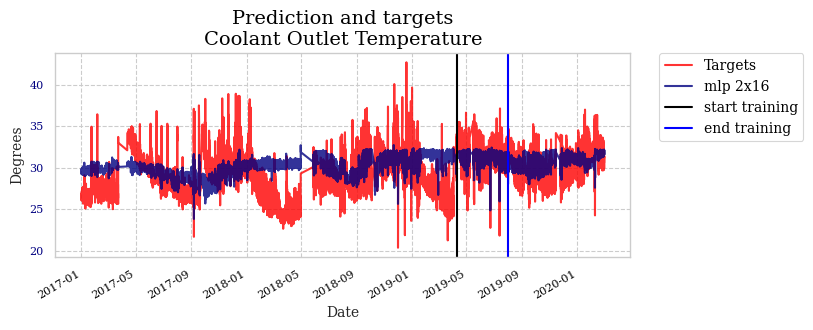

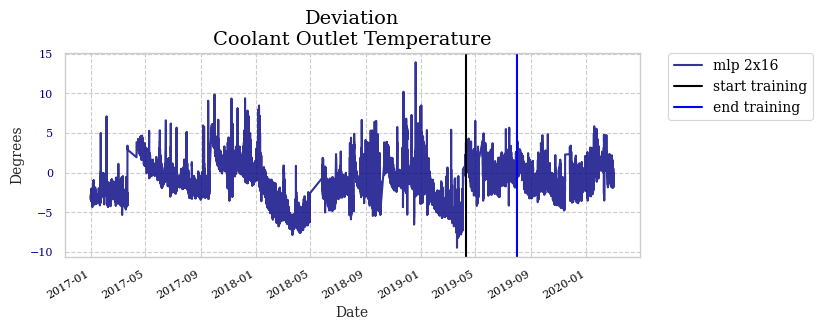

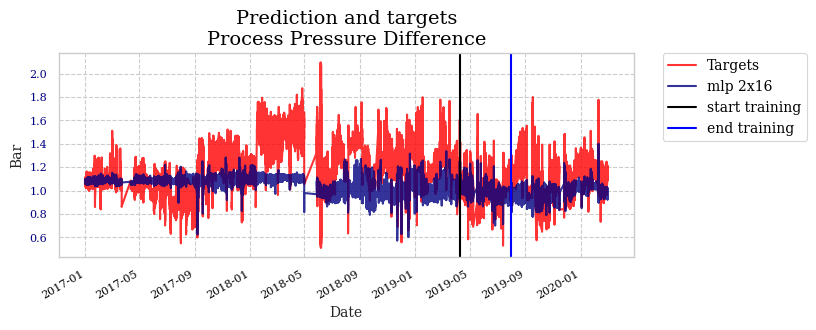

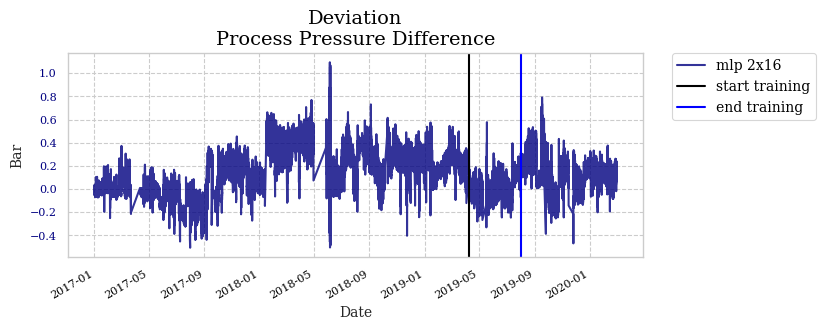

Model mlp 2x32 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 2x32 |  0.363819 |   0.721563  |    1.480559   |  301   |
+----------+-----------+-------------+---------------+--------+


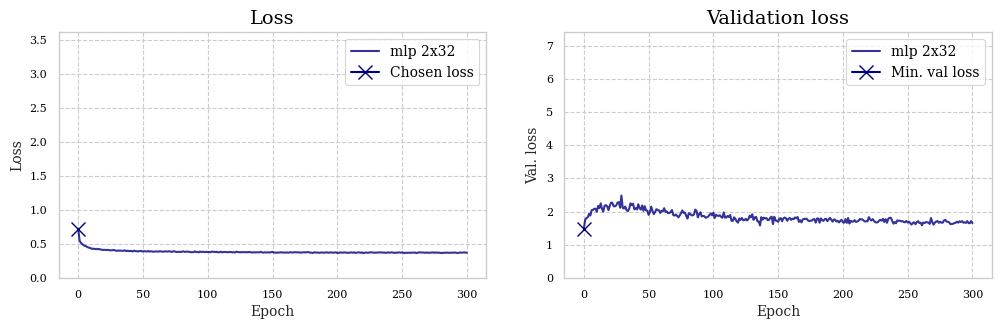

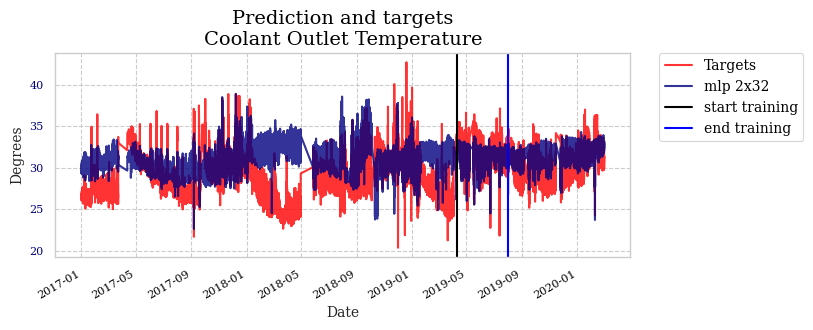

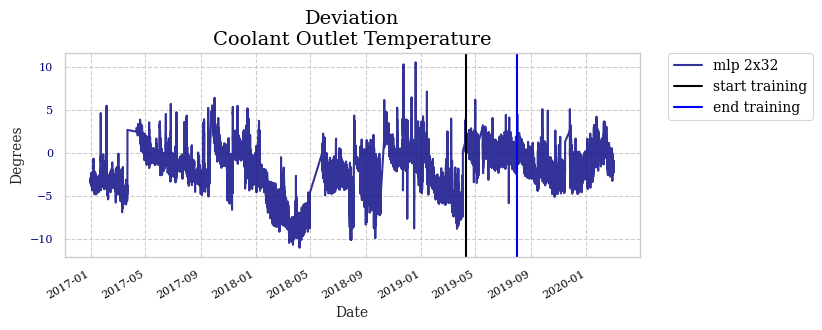

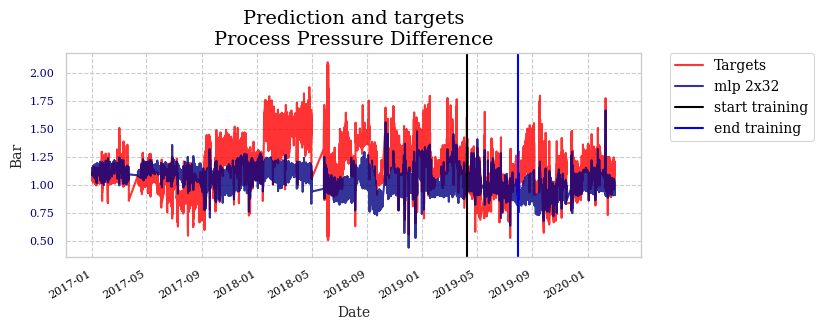

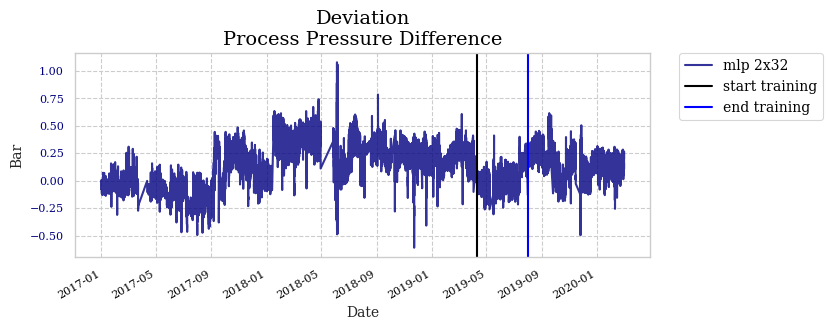

Model mlp 2x64 was loaded from file
+----------+-----------+-------------+---------------+--------+
|  Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+----------+-----------+-------------+---------------+--------+
| mlp 2x64 |  0.297285 |   0.333126  |    1.422824   |  375   |
+----------+-----------+-------------+---------------+--------+


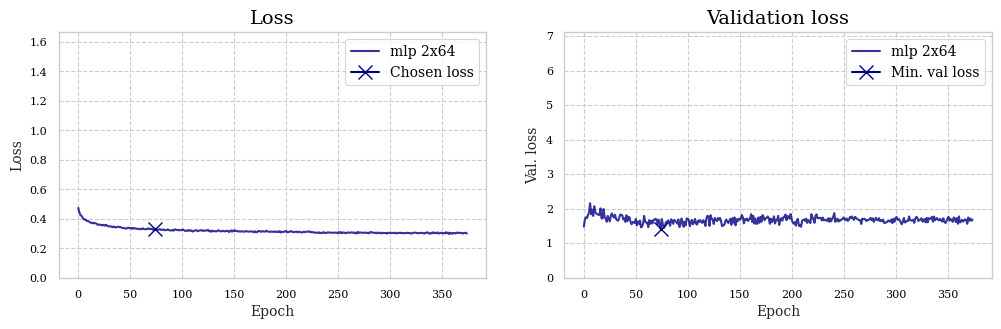

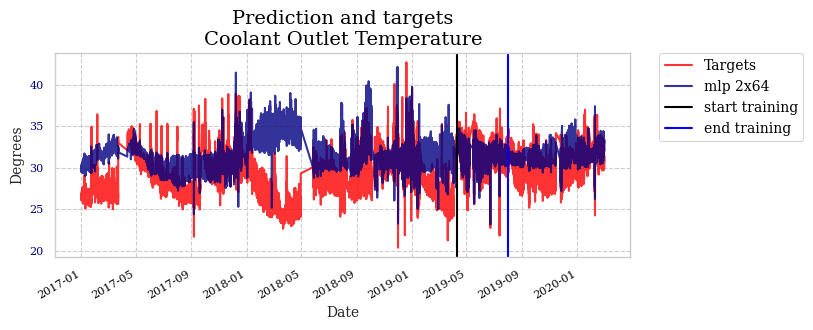

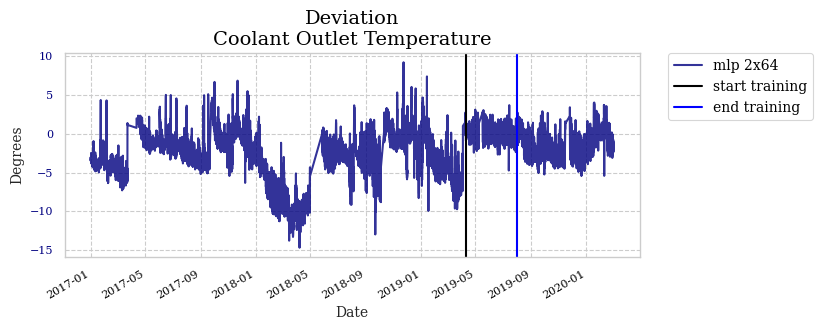

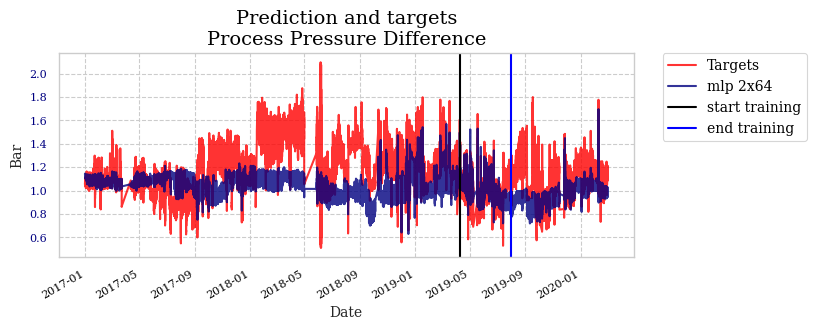

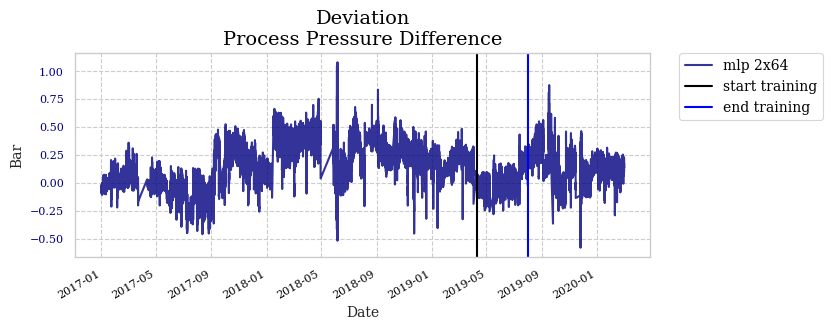

Model mlp 2x128 was loaded from file
+-----------+-----------+-------------+---------------+--------+
|   Model   | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------+-----------+-------------+---------------+--------+
| mlp 2x128 |  0.250416 |   0.278693  |    1.508482   |  382   |
+-----------+-----------+-------------+---------------+--------+


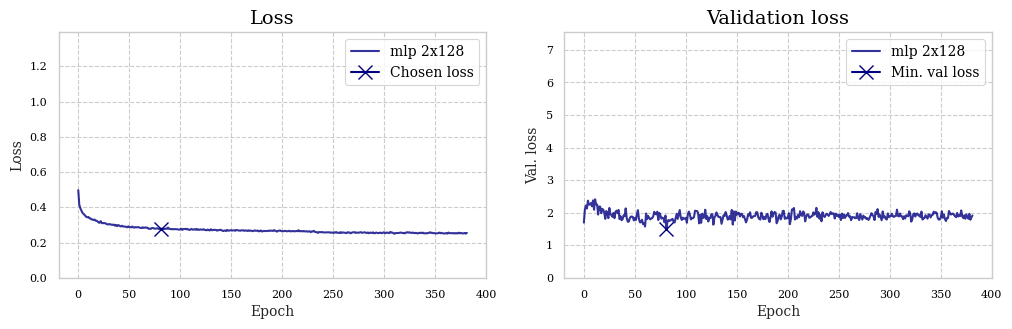

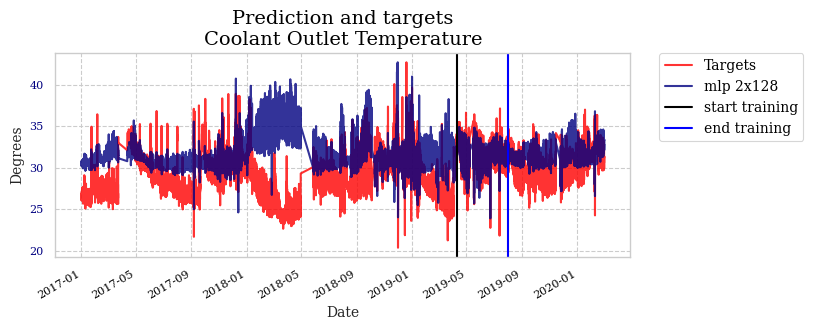

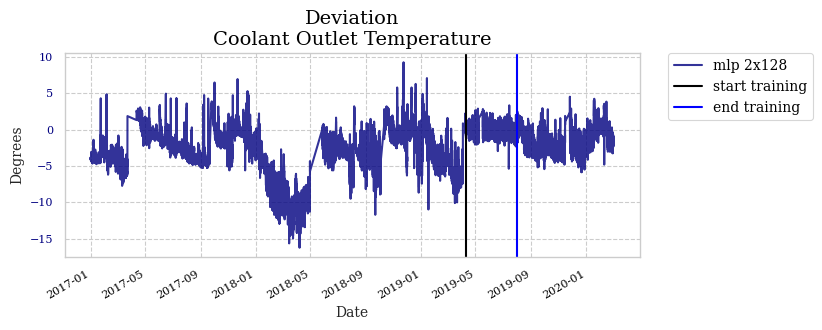

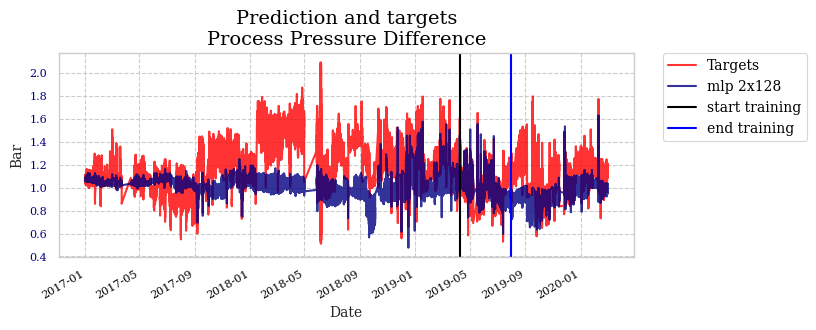

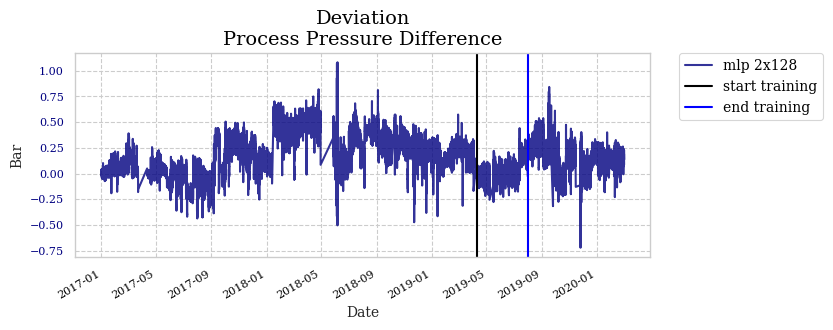

Model mlp 1x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 1x64 + linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.82814258  0.01791639 -0.05721699 -0.00653114]
 [ 0.0076107   0.05795189 -0.02256852  0.62712255]]
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| mlp 1x64 + linear, mlp 1x64 |  0.370477 |   0.403066  |    1.952459   |  307   |
+-----------------------------+-----------+-------------+---------------+--------+


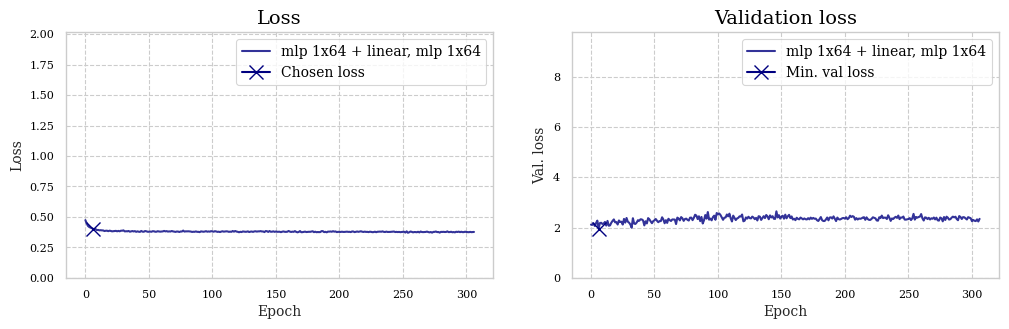

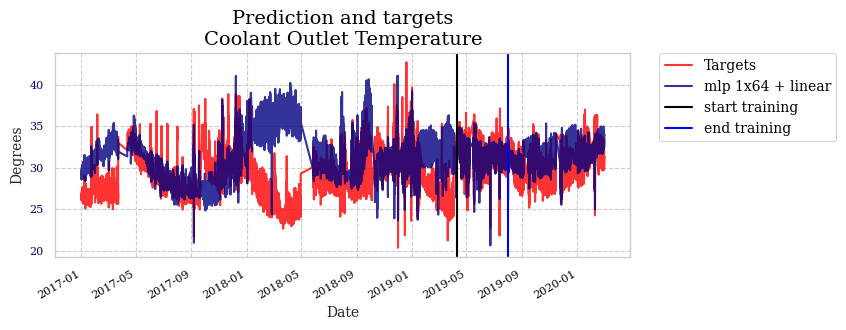

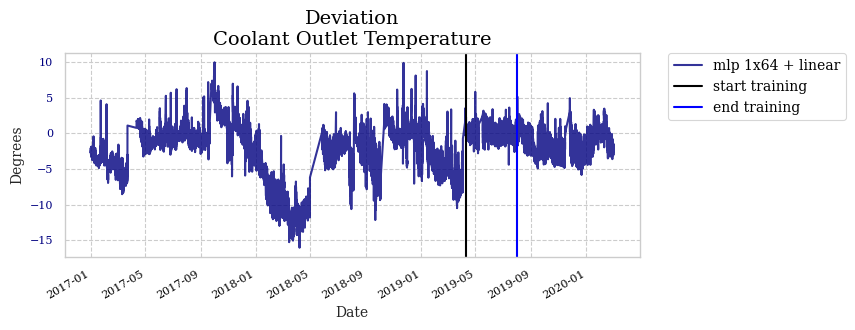

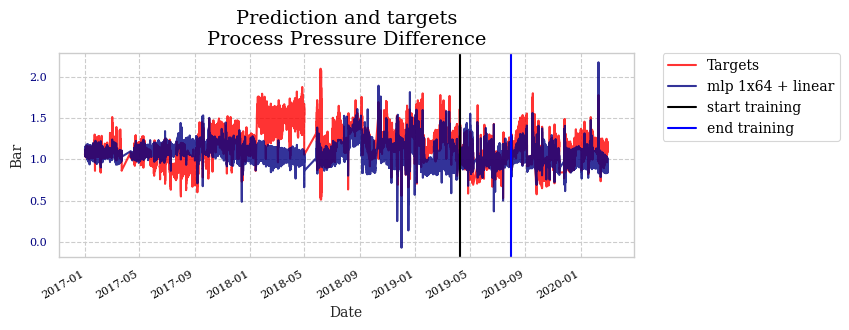

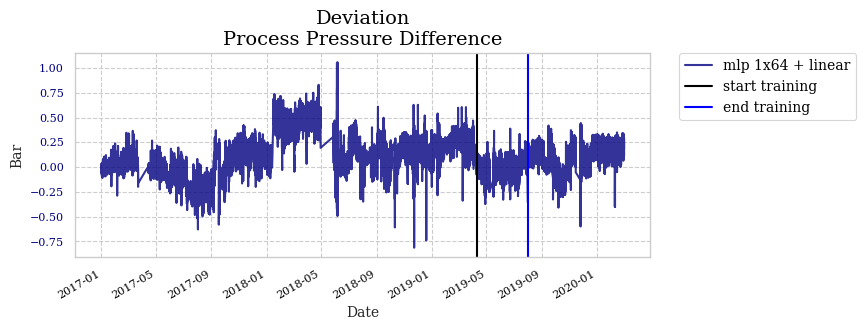

Model mlp 2x64 + linear was loaded from file
Training submodel linear of Ensemble mlp 2x64 + linear
    Trained weights for linear:
[[ 0.40514293 -0.0798533  -0.56135528 -0.35160217]
 [ 0.17121011  0.26264951  0.72230129  0.22615566]]
    Trained weights for Linear model of ensemble:
[[ 0.85820496  0.01653813 -0.01145752  0.02030923]
 [-0.00973256  0.27801347 -0.05630392  0.43574462]]
+-----------------------------+-----------+-------------+---------------+--------+
|            Model            | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------------------+-----------+-------------+---------------+--------+
| mlp 2x64 + linear, mlp 2x64 |  0.297285 |   0.333126  |    1.422824   |  375   |
+-----------------------------+-----------+-------------+---------------+--------+


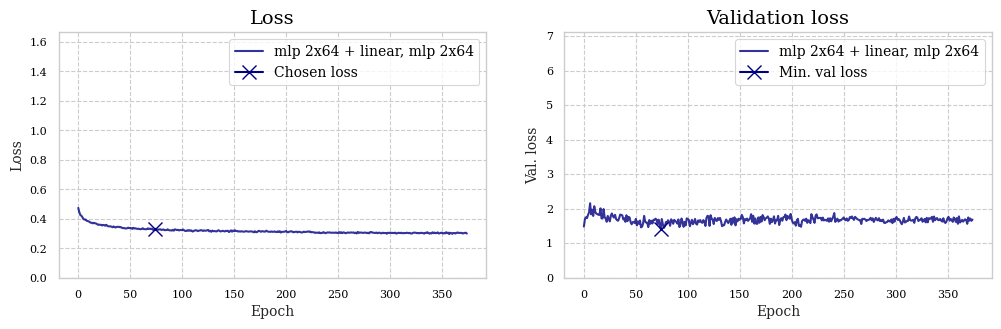

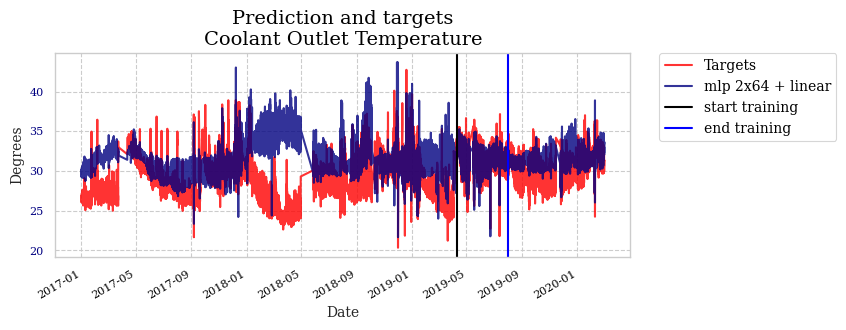

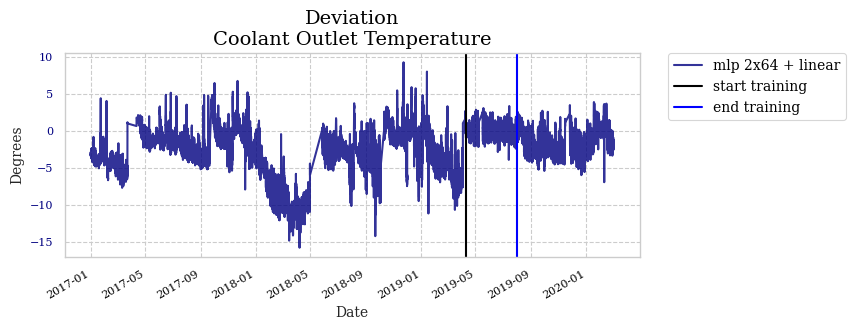

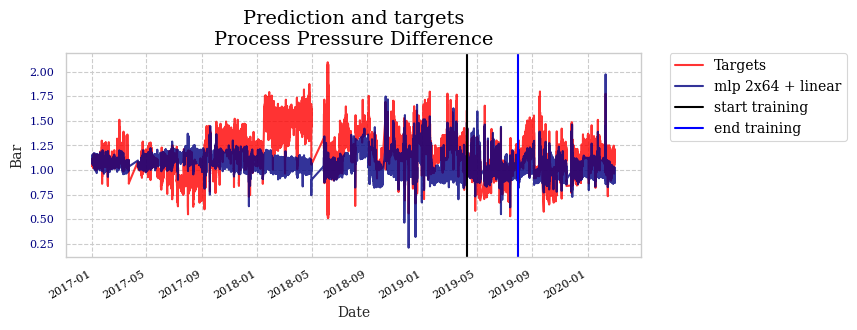

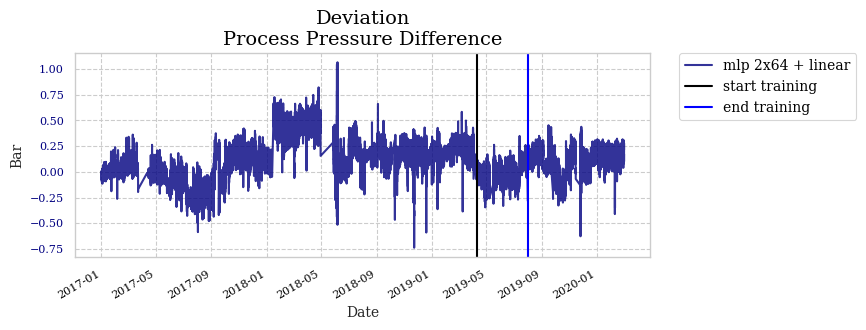

In [23]:
modelList = [
    linear_cv,
    mlp_1x_16,
    mlp_1x_32,
    mlp_1x_64,
    mlp_1x_128,
    mlp_2x_16,
    mlp_2x_32,
    mlp_2x_64,
    mlp_2x_128,
    ensemble,
    ensemble2,
]


for model in modelList:
    initTrainPredict([model], plot=True, score=False)